In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_class = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_regress = pd.read_csv('HousingData.csv')

In [3]:
data_class.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [4]:
data_regress.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87   NaN  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87   NaN  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

In [5]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data_regress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Data cleaning

In [7]:
data_class.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data_class.duplicated().sum()

0

In [9]:
data_regress.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### In fiecare coloana lipsesc aprox 3% din date, nu este un numar asa de mare ,asa ca putem elimina acele date

<AxesSubplot:>

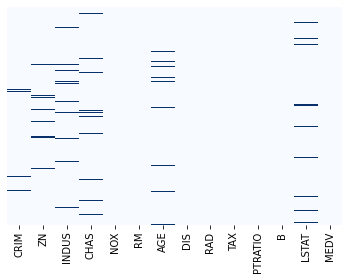

In [10]:
import seaborn as sns
call=data_regress.columns
sns.heatmap(data_regress[call].isnull(),cmap='Blues',yticklabels=False,cbar=False)

###  insa observam o distributie mare a datelor lipsa, ceea ce inseamna ca nu mai sunt acele 3% , dar mai mult

In [11]:
data_regress.duplicated().sum()

0

In [12]:
data_class.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [13]:
data_class = data_class.drop('customerID',axis = 1)
data_class.select_dtypes(object).head()

gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female     Yes         No           No  No phone service             DSL   
1    Male      No         No          Yes                No             DSL   
2    Male      No         No          Yes                No             DSL   
3    Male      No         No           No  No phone service             DSL   
4  Female      No         No          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  TotalCharges Churn  
0        29.85    No  
1       1889.5    No  
2       108.15   Yes  
3      1840.75    No  
4       151.65   Yes

In [3]:
for column in data_class.select_dtypes(object):
    print(data_class[column].value_counts())

NameError: name 'data_regress' is not defined

### Avem multe coloane care contin doar 2-3 valori

### Feature engineering

In [15]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()
for column in data_class.select_dtypes(object):
    data_class[column] = lbl_enc.fit_transform(data_class[column])
# data_class = data_class.replace(to_replace =['Female','Male'], value =[0,1])
# data_class = data_class.replace(to_replace =['No','Yes'], value =[0,1])
# data["MultipleLines"]=lbl_enc.fit_transform(data["MultipleLines"])
# data["InternetService"]=lbl_enc.fit_transform(data["InternetService"])



In [16]:
data_class.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1

In [17]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=10)
#for column in data_regress.loc[:, data_regress.isnull().any()]:
data_regress_knn = data_regress
data_regress_knn = pd.DataFrame(knn_imp.fit_transform(data_regress_knn),columns = data_regress_knn.columns)   
data_regress_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Inlocuim datele nule

### Datele initiale

<AxesSubplot:>

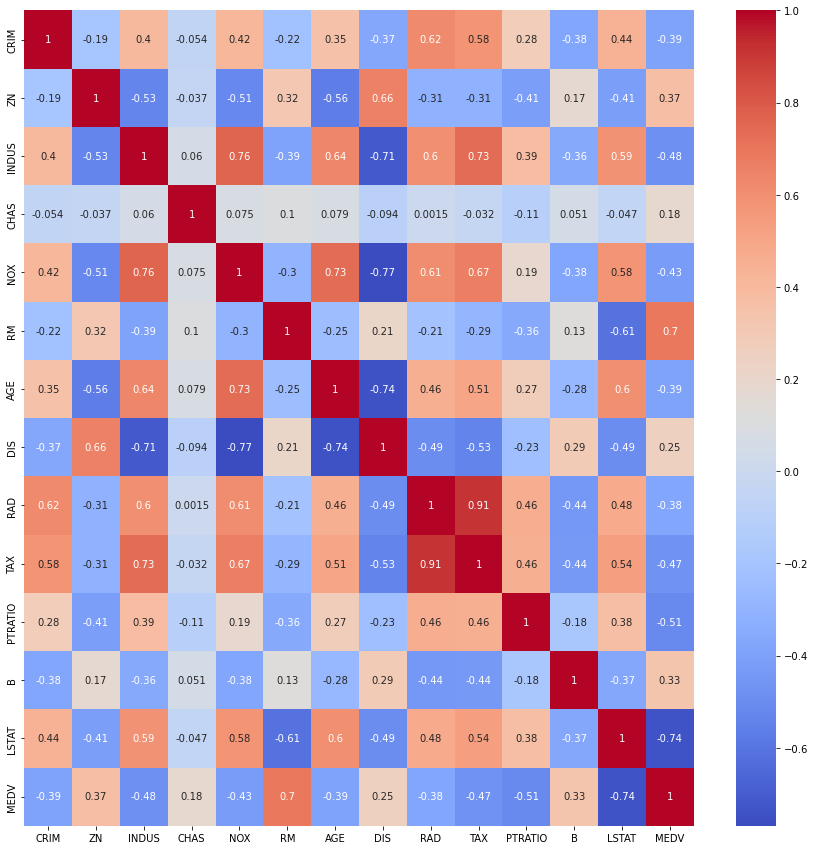

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data_regress.corr(),annot = True,cmap = 'coolwarm')

### Datele dupa knn

<AxesSubplot:>

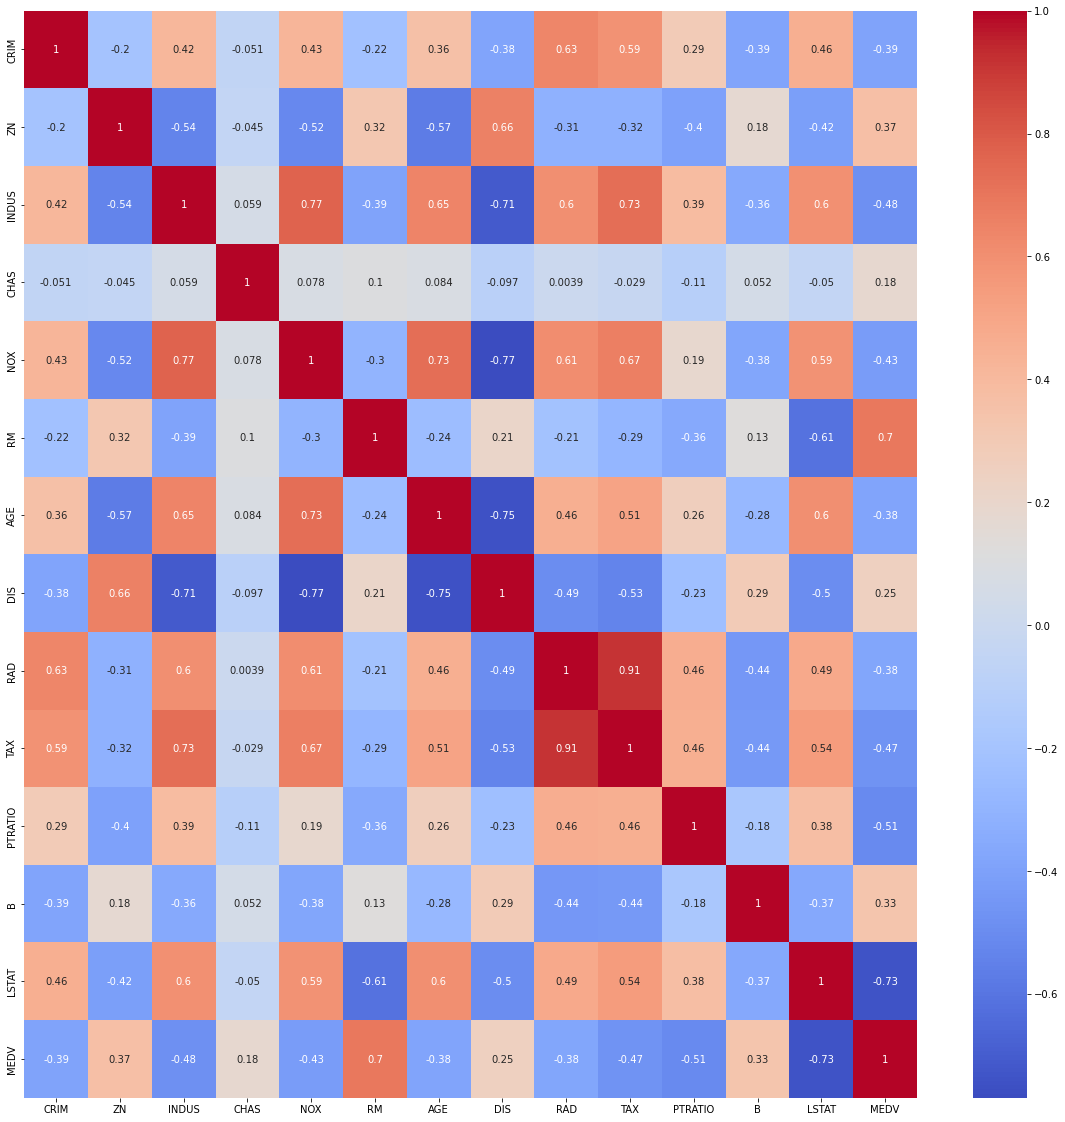

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data_regress_knn.corr(),annot = True,cmap = 'coolwarm')

### Putem observa ca datele sunt un pic mai rele asa ca ramanem la eliminarea celor nule

<AxesSubplot:>

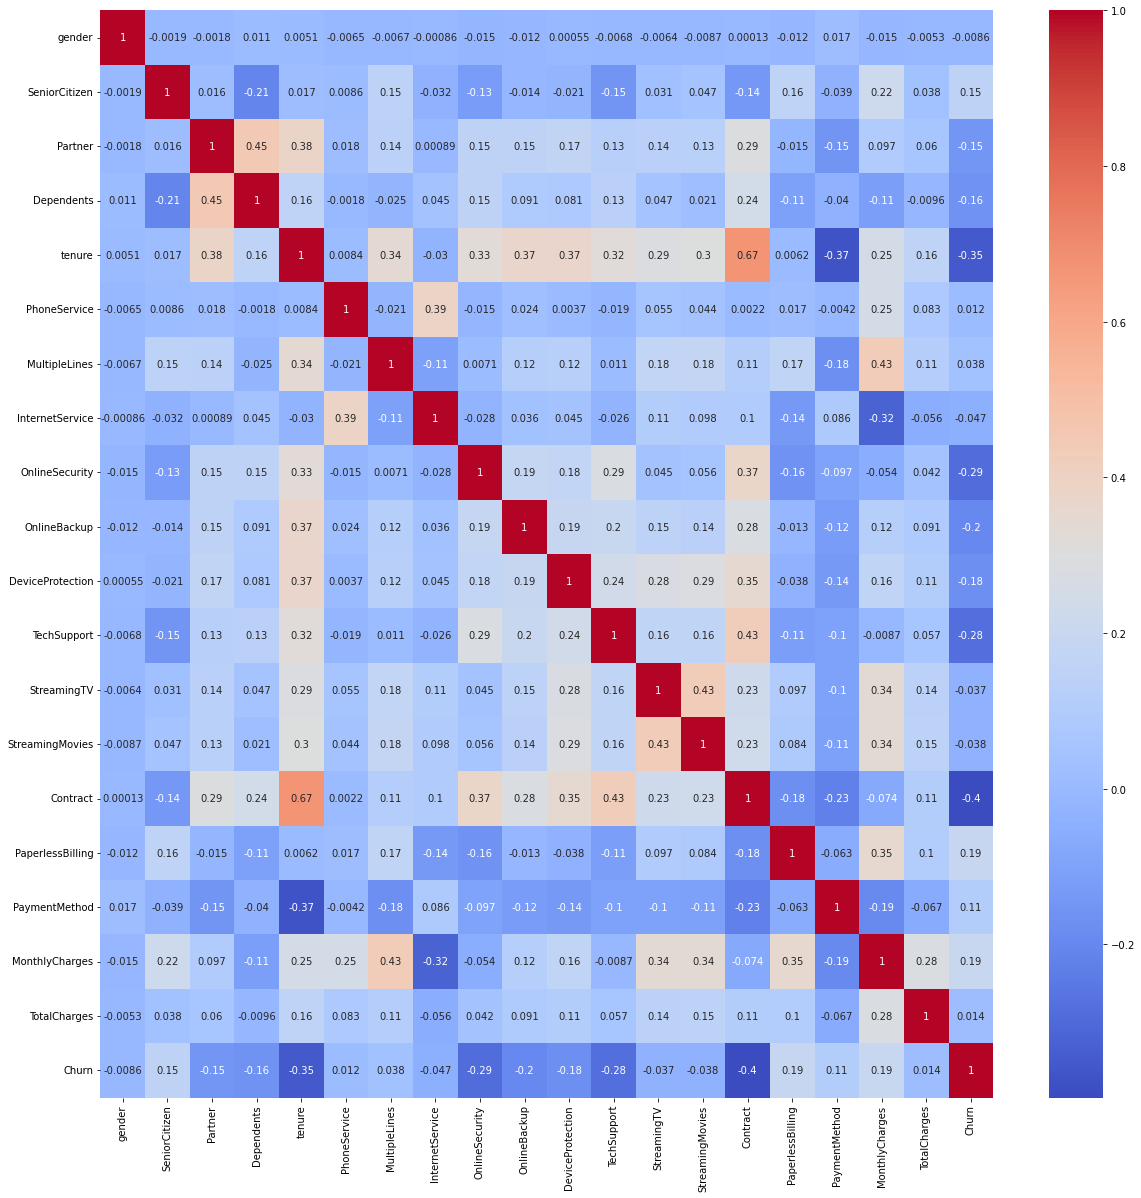

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(data_class.corr(),annot = True,cmap = 'coolwarm')

### Deoarece PCA se foloseste mai mult la date continue,iar noi aici avem date de tip category, fiind majoritatea binare,v-om folosi doar feature selection in datasetul de clasificare

In [21]:

from kydavra import PointBiserialCorrSelector
pointbiserial = PointBiserialCorrSelector(min_corr = 0.2)
selectedcolumn=pointbiserial.select(data_class,'Churn')
X_select = data_class.loc[:,selectedcolumn]
y_select = data_class.loc[:,'Churn']
X_class_select = pd.DataFrame(data = X_select,columns = X_select.columns)
y_class_select = pd.DataFrame(data = y_select,columns = ['Churn'])
data_class_select = pd.concat([X_class_select,y_class_select],axis = 1)

<Figure size 1440x1440 with 0 Axes>

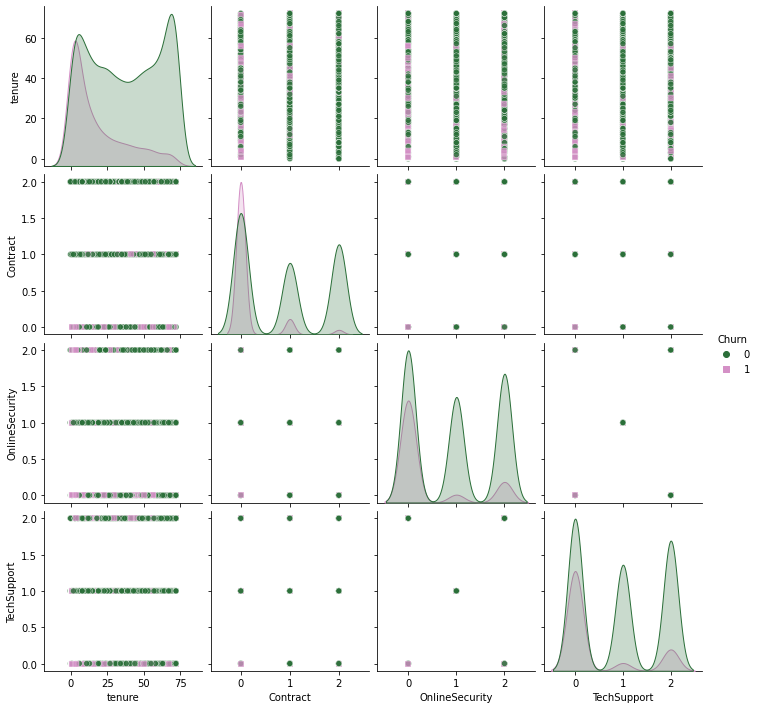

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data_class_select, hue = 'Churn',markers=["o", "s"], palette="cubehelix",plot_kws=dict(alpha=0.8))
plt.show()

### Distributia datelor in comparatie cu coloana Target di subsetul selectat

### datasetul de clasificare initial
#### folosim 7 algoritmi de clasificare LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,BernoulliNB,MultinomialNB

In [23]:
from sklearn.model_selection import train_test_split
X_train_select,X_test_select,y_train_select,y_test_select = train_test_split(X_select,y_select,test_size = 0.2)
X = data_class.drop('Churn',axis = 1)
y = data_class.loc[:,'Churn']
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(X,y,test_size = 0.2)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1042
           1       0.65      0.52      0.58       367

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1042
           1       0.62      0.47      0.53       367

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1042
           1       0.61      0.55      0.58       367

    accuracy                           0.79      1409
   macro avg      

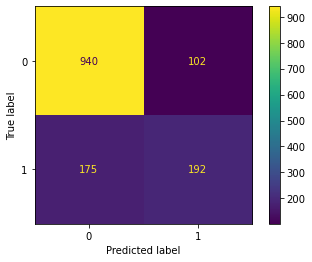

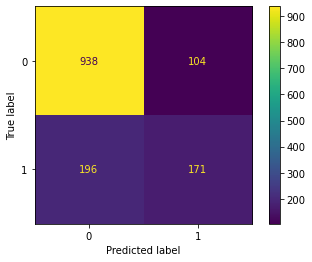

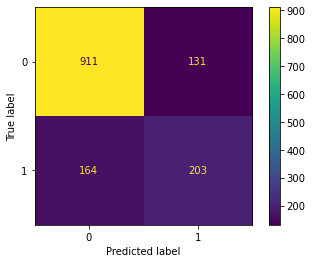

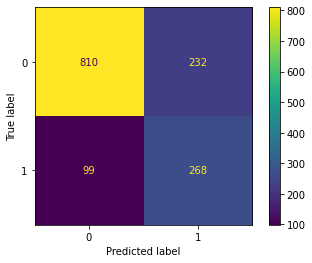

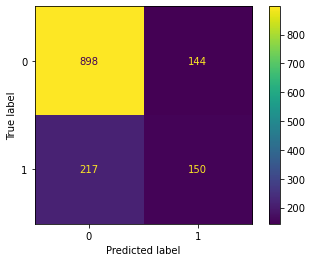

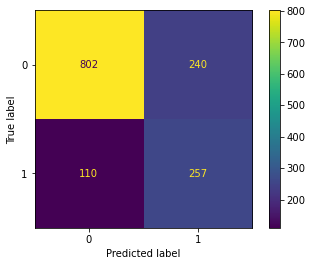

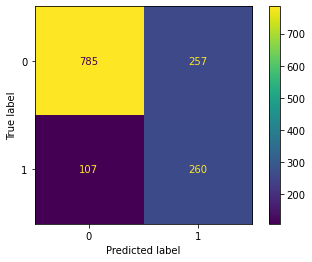

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
f1_initial_class = []
accuracy_initial_class = []
precision_initial_class = []
recall_initial_class = []
model_list=[LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,BernoulliNB,MultinomialNB]
str_model_list=['LR','RF','DT','GNB','KNN','BNB','MNB']

for model in model_list :
    if model == model_list[2]:
        clf = model(max_depth = 5,random_state = 0)
        clf.fit(X_train_class,y_train_class)
        y_pred_tree = clf.predict(X_test_class)
        f1_initial_class.append(f1_score(y_test_class, y_pred_tree))
        accuracy_initial_class.append(accuracy_score(y_test_class, y_pred_tree))
        precision_initial_class.append(precision_score(y_test_class, y_pred_tree))
        recall_initial_class.append(recall_score(y_test_class, y_pred_tree))
        ConfusionMatrixDisplay.from_predictions(y_test_class,y_pred_tree)
        print("\n "+str(model)+"\n "+ classification_report(y_test_class, y_pred_tree))
    else:
        model = model()
        model.fit(X_train_class,y_train_class)
        y_pred_class = model.predict(X_test_class)
        f1_initial_class.append(f1_score(y_test_class, y_pred_class))
        accuracy_initial_class.append(accuracy_score(y_test_class, y_pred_class))
        precision_initial_class.append(precision_score(y_test_class, y_pred_class))
        recall_initial_class.append(recall_score(y_test_class, y_pred_class))
        ConfusionMatrixDisplay.from_predictions(y_test_class,y_pred_class)
        print("\n "+str(model)+"\n "+ classification_report(y_test_class, y_pred_class))

    

### Observam ca clasele nu sunt chiar balansate
### Decision Tree

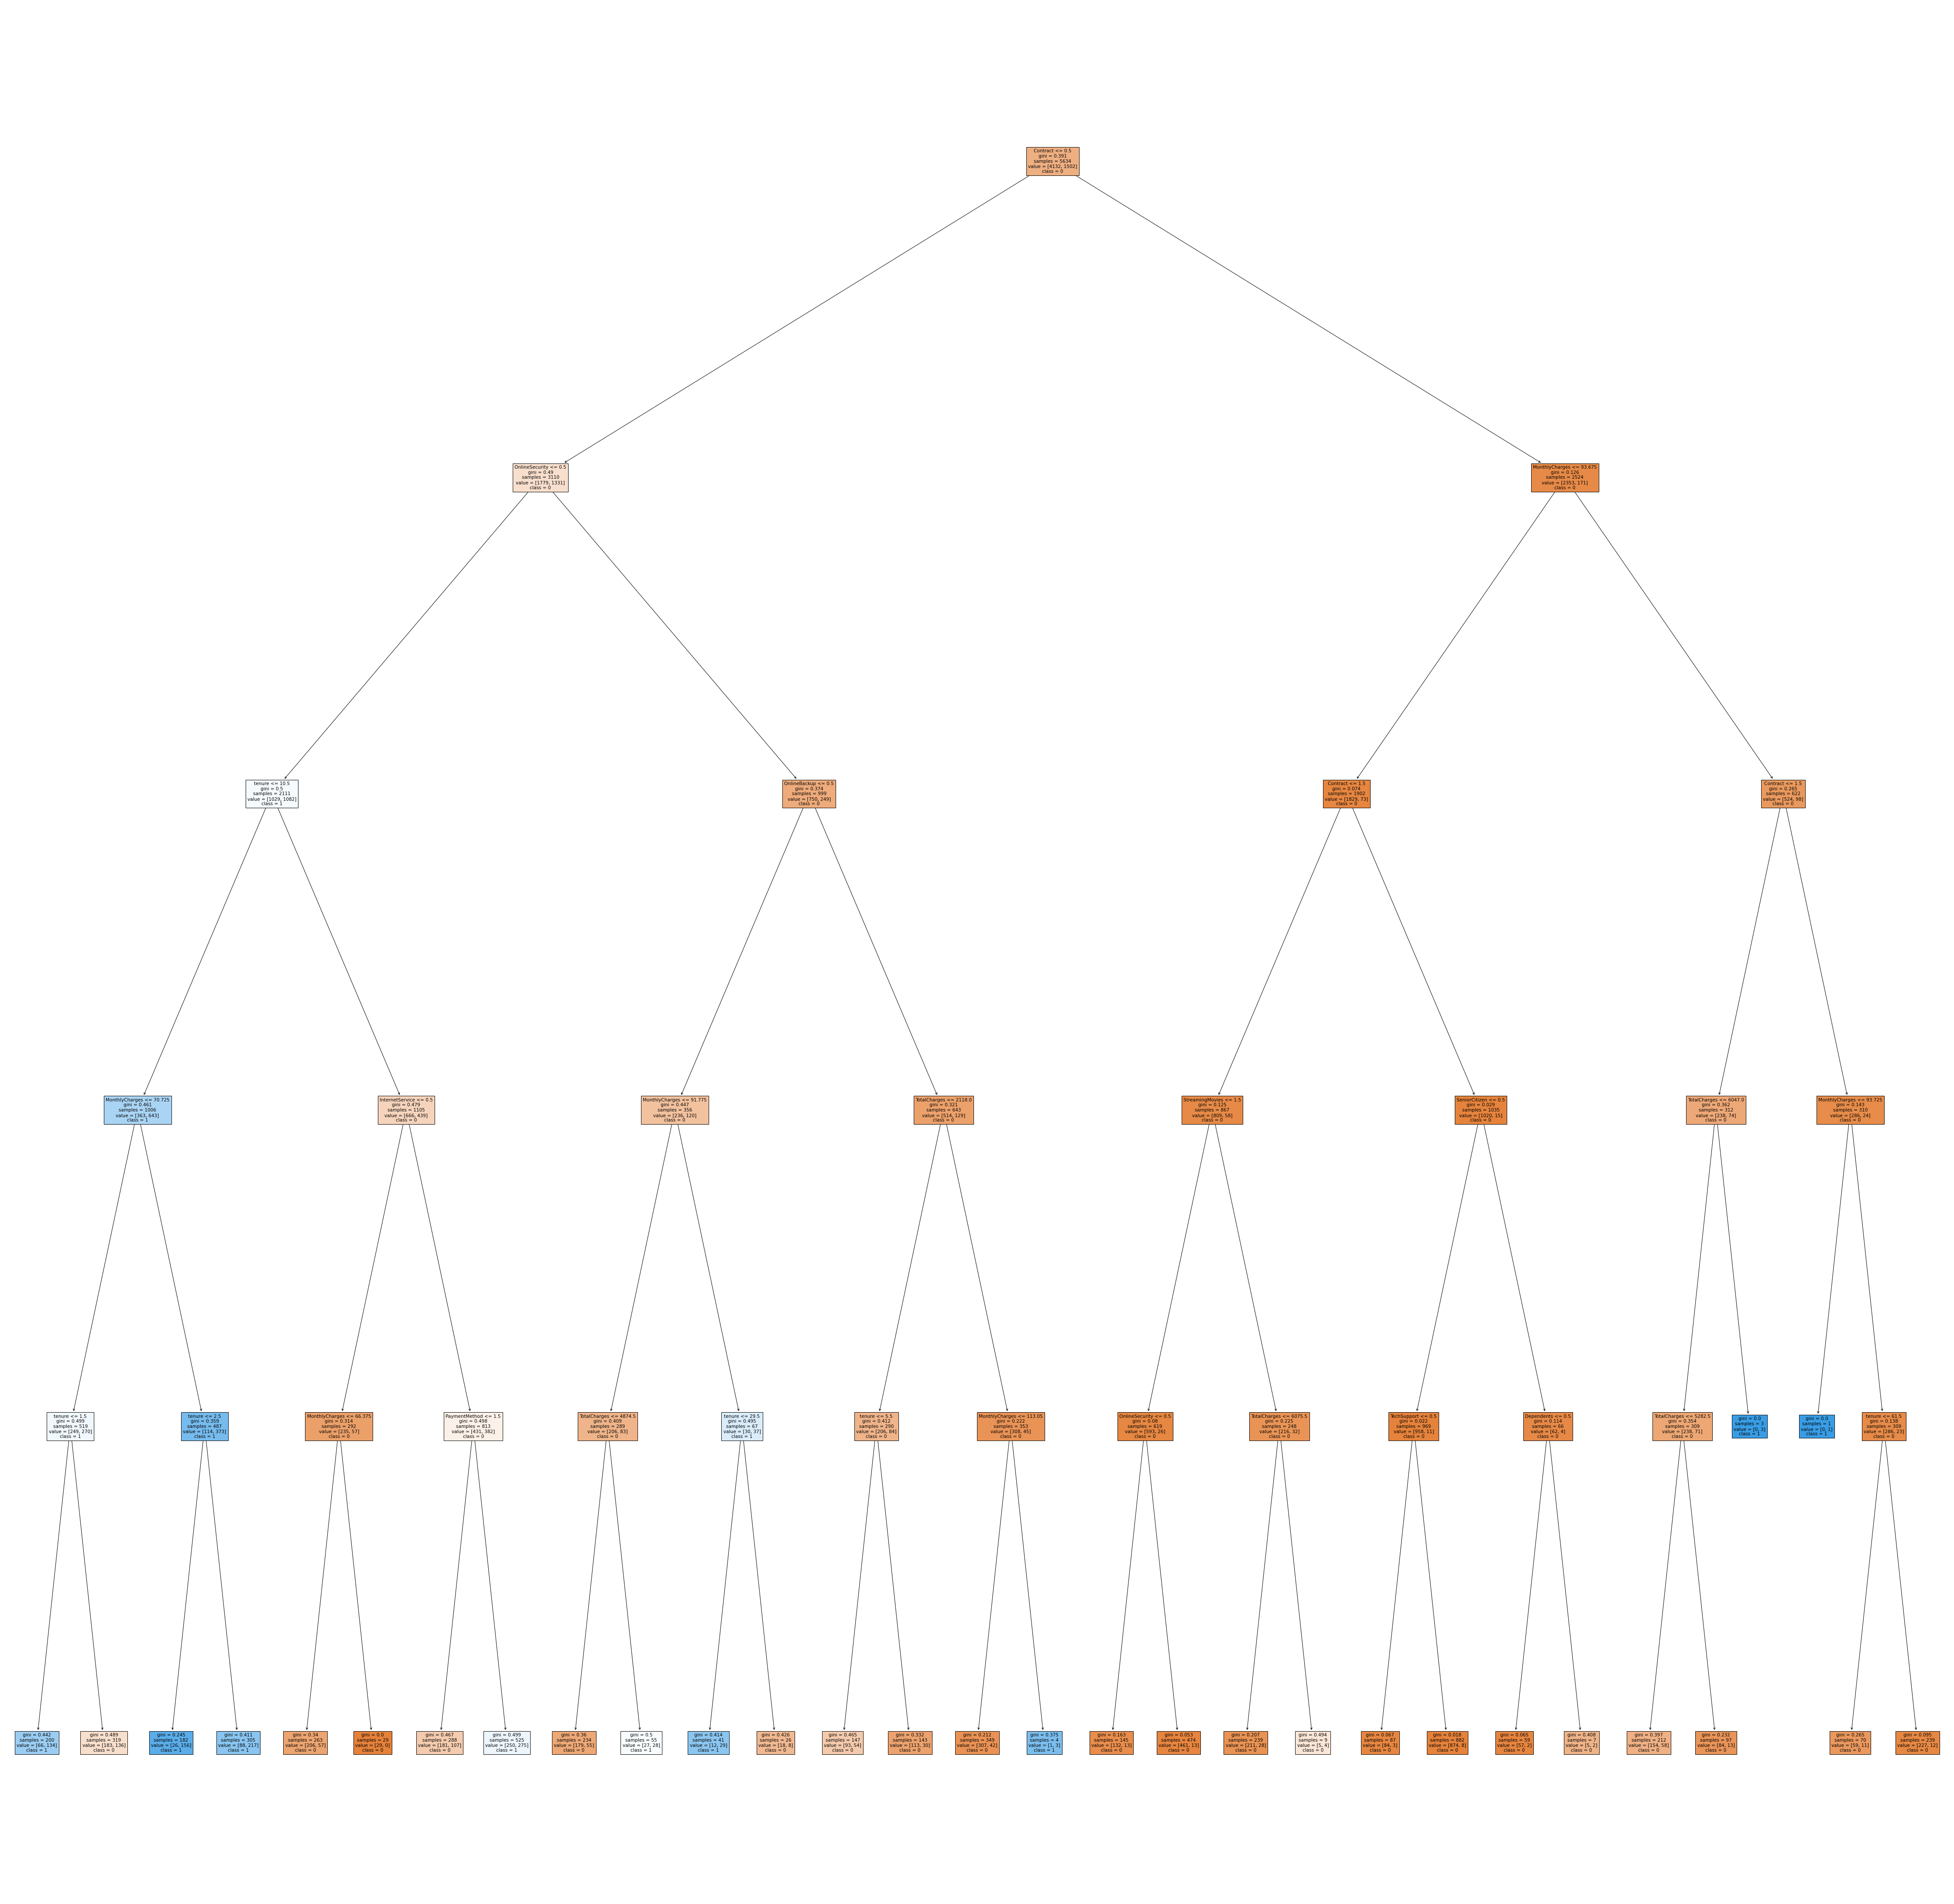

In [25]:
fn=X.columns
cn=['0','1']
plt.figure(figsize=(80,80))
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Obsrvam ca ramura care incepe cu Online security este una buna in comparatie cu Monthly changes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


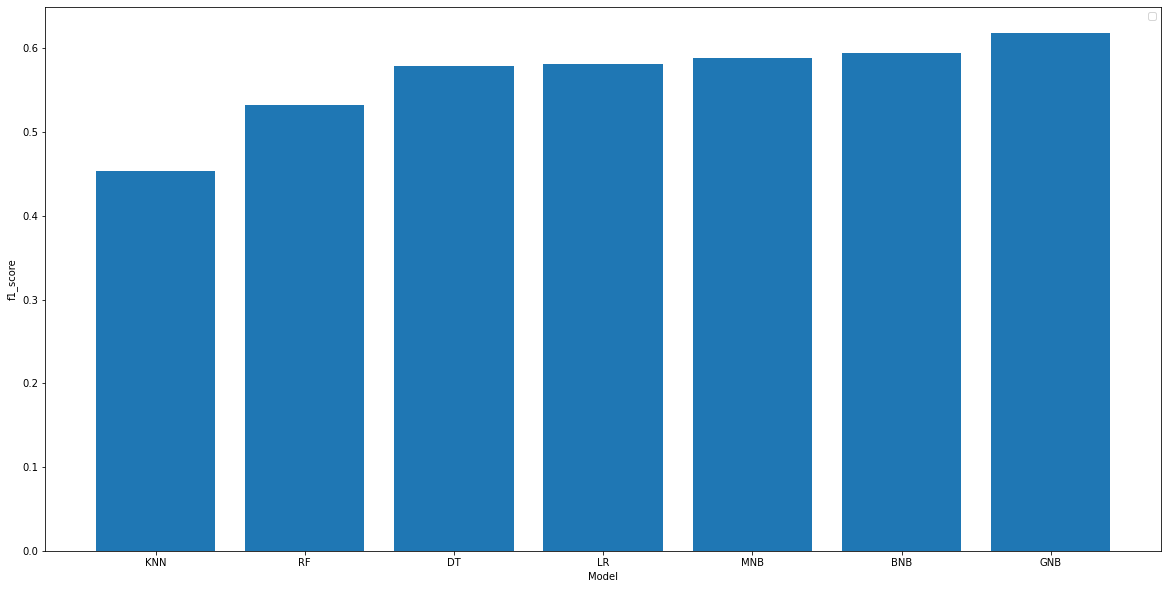

In [26]:
fig = plt.figure(figsize = (20,10)) 
#X_axis = np.arange(len(report_list))  
#plt.bar(X_axis - 0.2, report_list, 0.4, label = '0 f1-score')
#plt.bar(X_axis + 0.2, report_list_1, 0.4, label = '1 f1-score')
#plt.bar(X_axis + 0.0, avg_report_list, 0.3, label = 'avg f1-score') 
df = pd.DataFrame({"Model":str_model_list,
                  "f1_score":f1_initial_class})
df_sorted= df.sort_values('f1_score')
plt.bar('Model', 'f1_score',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("f1_score")
plt.legend()
plt.show()

### observam ca modelele care au folosit datasetul balansat au cel mai bun rezultat

## Feature selection


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1044
           1       0.57      0.46      0.51       365

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1044
           1       0.53      0.49      0.51       365

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.79      0.96      0.86      1044
           1       0.68      0.27      0.39       365

    accuracy                           0.78      1409
   macro avg      

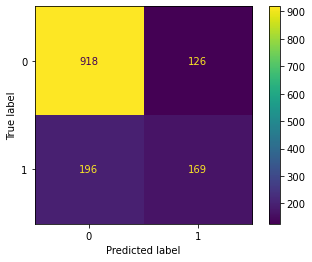

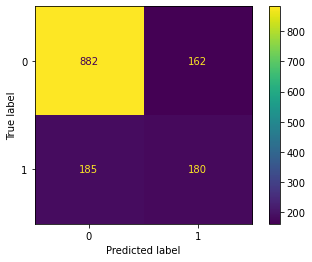

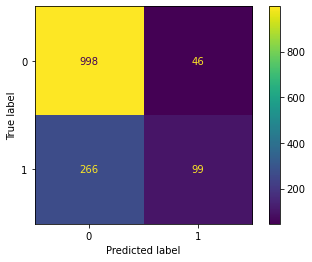

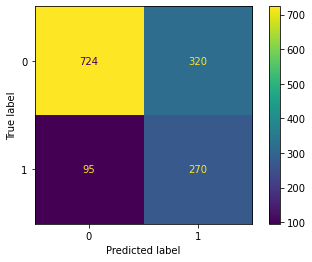

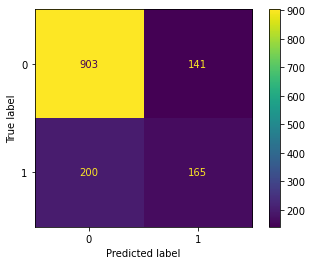

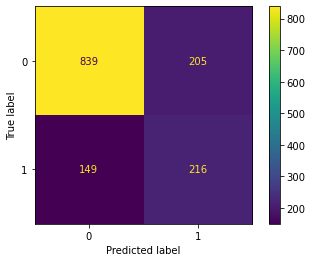

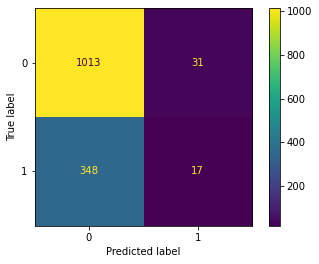

In [27]:
f1_class_select = []
accuracy_select = []
precision_select = []
recall_select = []
from sklearn import tree
for model in model_list : 
    if model == model_list[2]:
        clf = model(max_depth = 4,random_state = 0)
        clf.fit(X_train_select,y_train_select)
        y_pred_select_tree = clf.predict(X_test_select)
        f1_class_select.append(f1_score(y_test_select, y_pred_select_tree))
        accuracy_select.append(accuracy_score(y_test_select, y_pred_select_tree))
        precision_select.append(precision_score(y_test_select, y_pred_select_tree))
        recall_select.append(recall_score(y_test_select, y_pred_select_tree))
        ConfusionMatrixDisplay.from_predictions(y_test_select,y_pred_select_tree)
        print("\n "+str(model)+"\n "+ classification_report(y_test_select, y_pred_select_tree))
    else:
        model = model()
        model.fit(X_train_select,y_train_select)
        y_pred_select = model.predict(X_test_select)
        f1_class_select.append(f1_score(y_test_select, y_pred_select))
        accuracy_select.append(accuracy_score(y_test_select, y_pred_select))
        precision_select.append(precision_score(y_test_select, y_pred_select))
        recall_select.append(recall_score(y_test_select, y_pred_select))
        ConfusionMatrixDisplay.from_predictions(y_test_select,y_pred_select)
        print("\n "+str(model)+"\n "+ classification_report(y_test_select, y_pred_select))

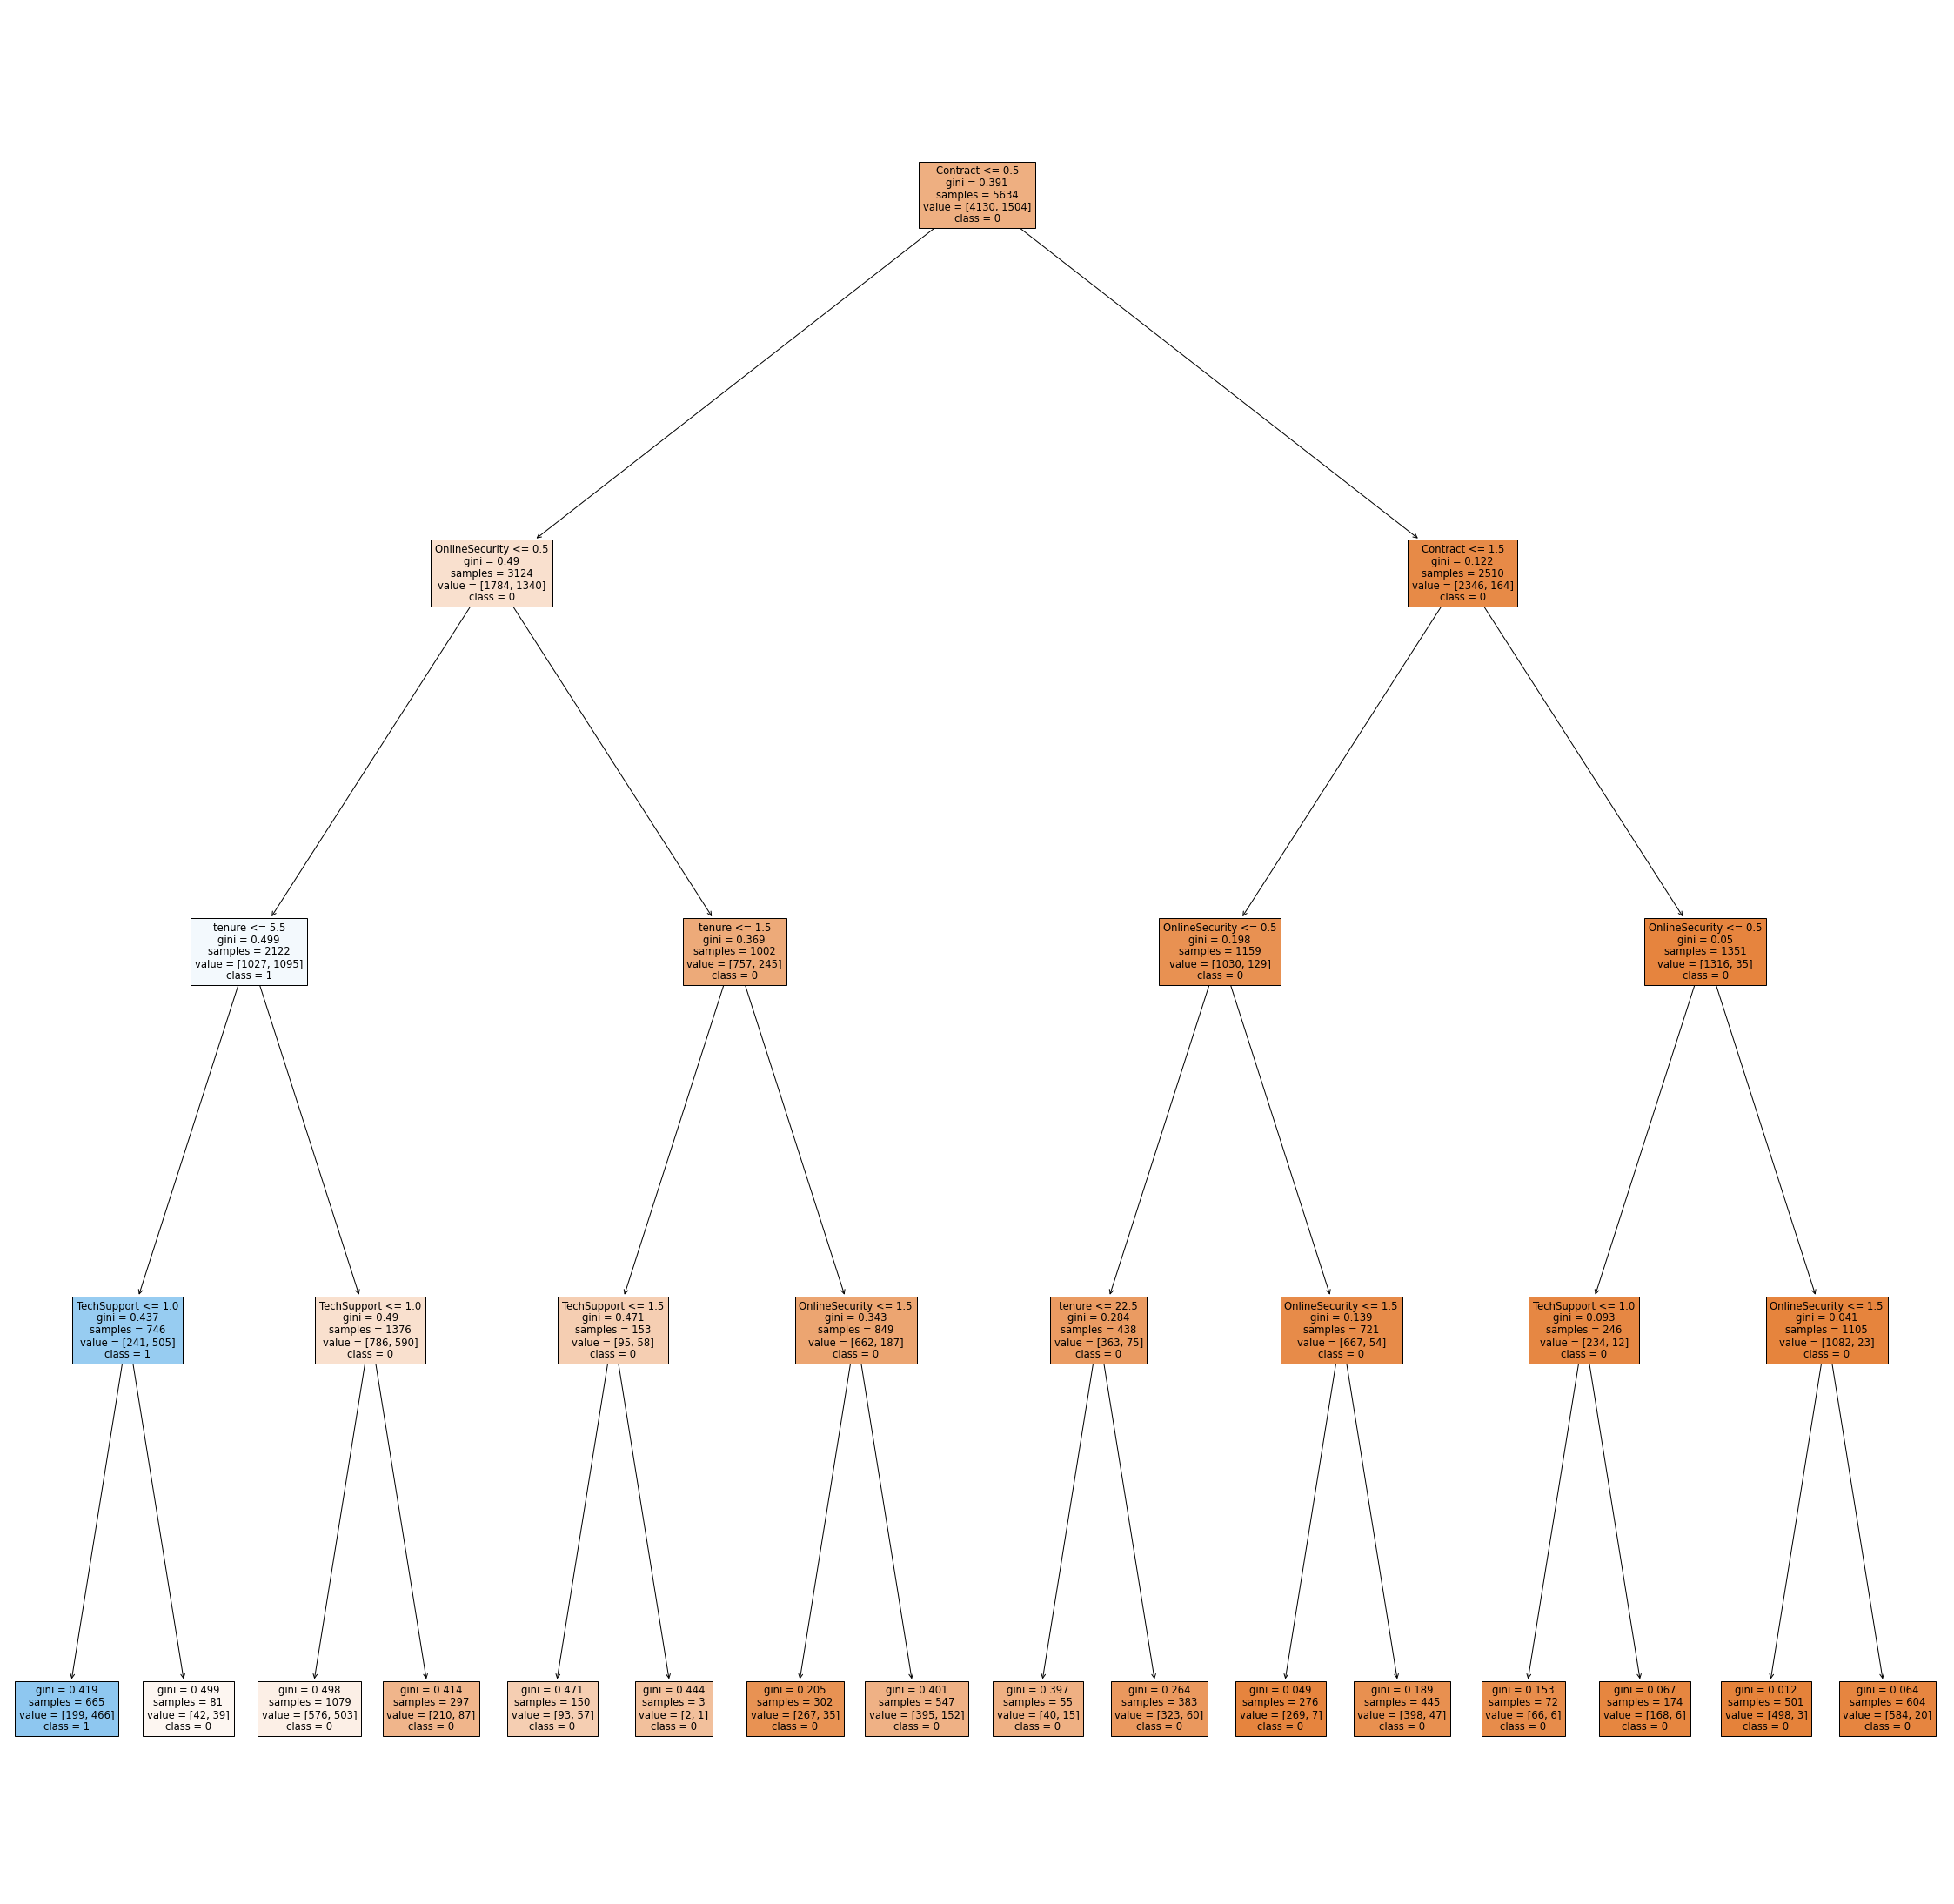

In [28]:
fn=X_select.columns
cn=['0','1']
plt.figure(figsize=(40,40))
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### Deoarece subsetul este mai mic, setam adancimea arbore 4 ,si observam o singura dezvoltare a deciziilor optimala
### Balansam datasetul

In [29]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=12)
X_bal,y_bal=smk.fit_resample(X_train_select, y_train_select)
X_train_bal,X_test_bal,y_train_bal,y_test_bal=train_test_split(X_bal,y_bal,test_size=0.2,random_state=42)


 LogisticRegression()
               precision    recall  f1-score   support

           0       0.84      0.63      0.72       831
           1       0.70      0.88      0.78       821

    accuracy                           0.76      1652
   macro avg       0.77      0.76      0.75      1652
weighted avg       0.77      0.76      0.75      1652


 RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.84      0.72      0.77       831
           1       0.75      0.86      0.80       821

    accuracy                           0.79      1652
   macro avg       0.80      0.79      0.79      1652
weighted avg       0.80      0.79      0.79      1652


 <class 'sklearn.tree._classes.DecisionTreeClassifier'>
               precision    recall  f1-score   support

           0       0.83      0.71      0.76       831
           1       0.74      0.85      0.79       821

    accuracy                           0.78      1652
   macro avg      

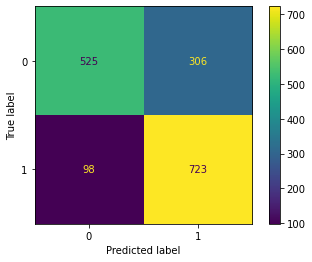

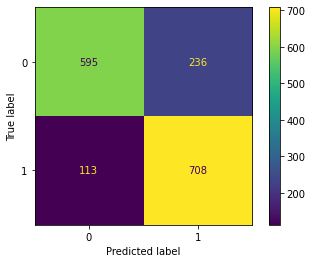

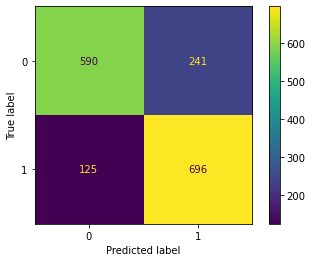

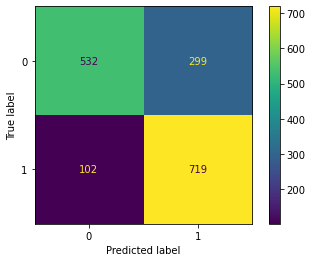

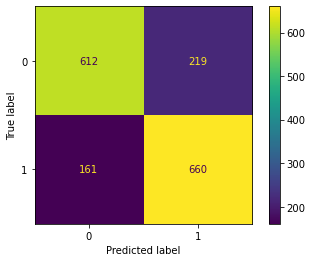

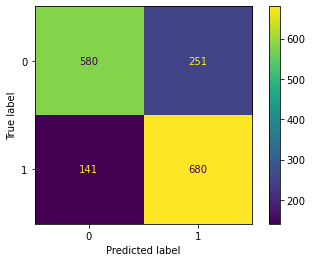

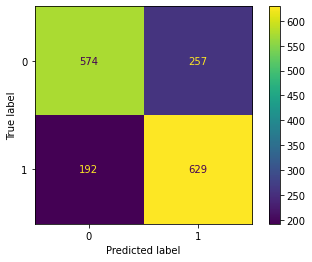

In [30]:
f1_class_bal = []
accuracy_bal= []
precision_bal = []
recall_bal = []
from sklearn import tree
for model in model_list : 
    if model == model_list[2]:
        clf_bal = model(max_depth = 4,random_state = 0)
        clf_bal.fit(X_train_bal,y_train_bal)
        y_pred_bal_tree = clf_bal.predict(X_test_bal)
        f1_class_bal.append(f1_score(y_test_bal, y_pred_bal_tree))
        accuracy_bal.append(accuracy_score(y_test_bal, y_pred_bal_tree))
        precision_bal.append(precision_score(y_test_bal, y_pred_bal_tree))
        recall_bal.append(recall_score(y_test_bal, y_pred_bal_tree))
        ConfusionMatrixDisplay.from_predictions(y_test_bal,y_pred_bal_tree)
        print("\n "+str(model)+"\n "+ classification_report(y_test_bal, y_pred_bal_tree))
    else:
        model = model()
        model.fit(X_train_bal,y_train_bal)
        y_pred_bal = model.predict(X_test_bal)
        f1_class_bal.append(f1_score(y_test_bal, y_pred_bal))
        accuracy_bal.append(accuracy_score(y_test_bal, y_pred_bal))
        precision_bal.append(precision_score(y_test_bal, y_pred_bal))
        recall_bal.append(recall_score(y_test_bal, y_pred_bal))
        ConfusionMatrixDisplay.from_predictions(y_test_bal,y_pred_bal)
        print("\n "+str(model)+"\n "+ classification_report(y_test_bal, y_pred_bal))

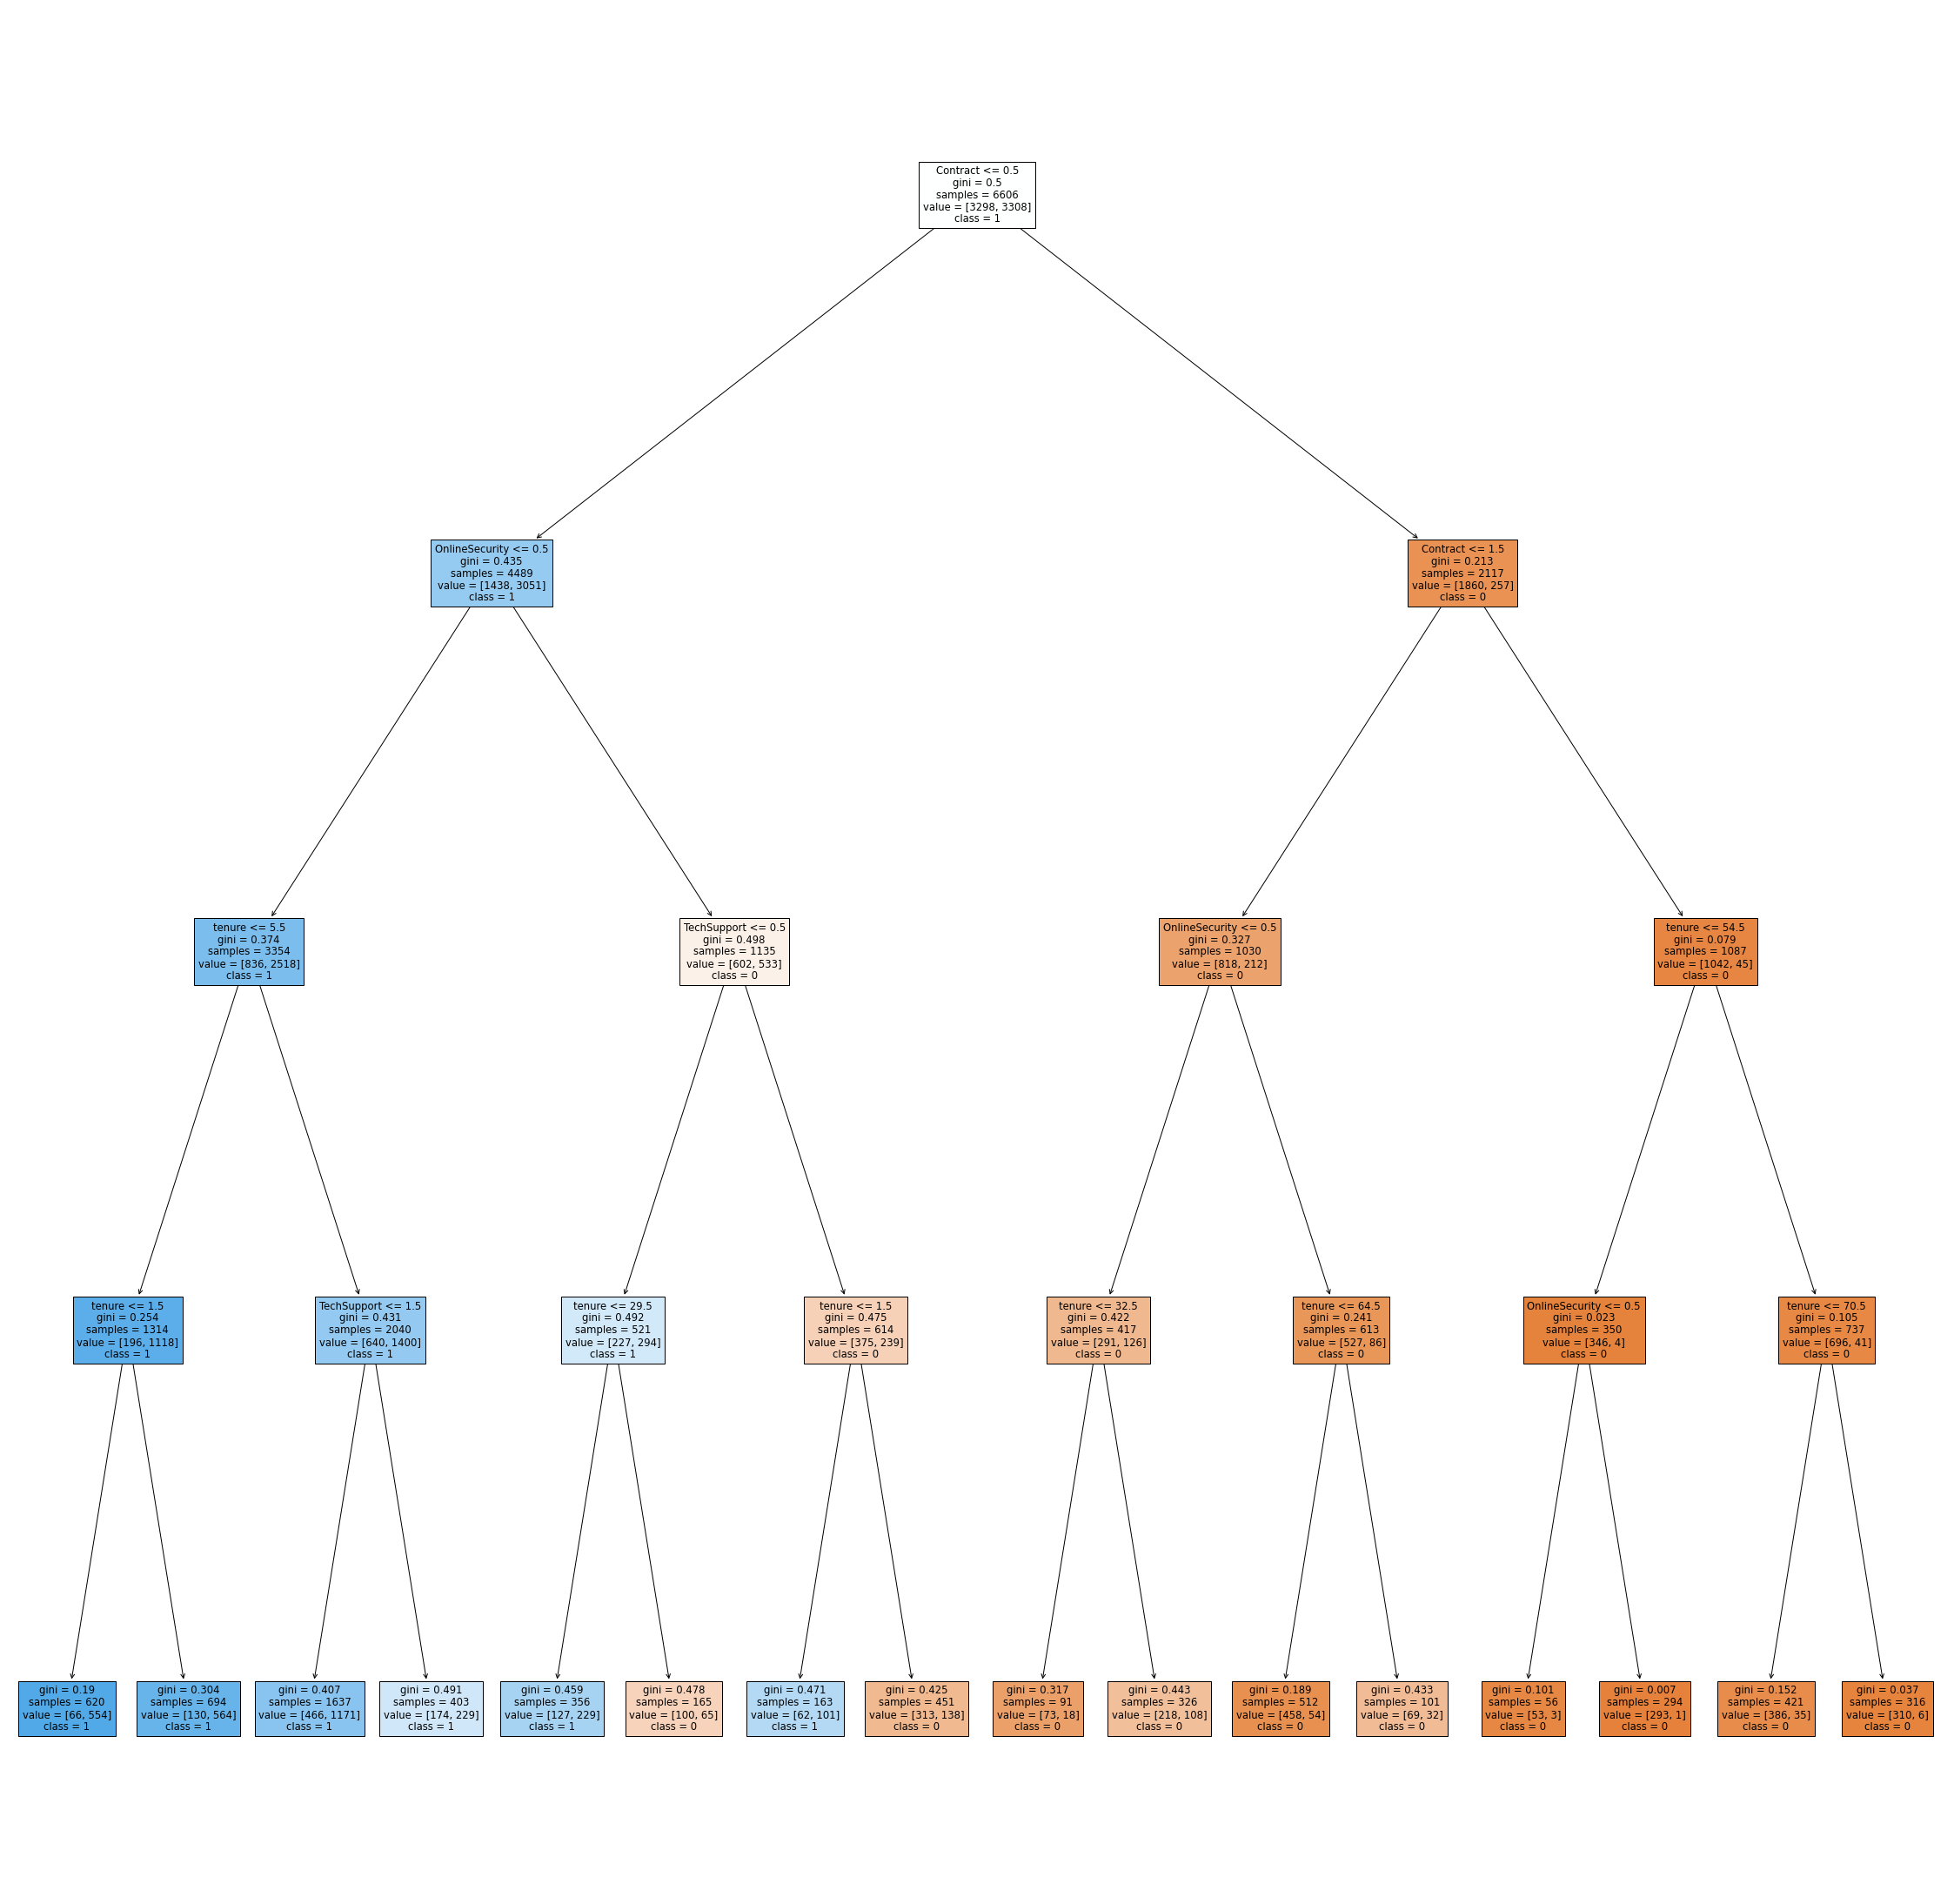

In [31]:
fn=X_select.columns
cn=['0','1']
plt.figure(figsize=(40,40))
tree.plot_tree(clf_bal,
               feature_names = fn, 
               class_names=cn,
               filled = True);

### In acest arbore sunt mai multe cazuri posibile care au rezultat bun
### Pregatim datele pentru vizualizare

In [32]:
str_model_list=['LR','RF','DT','GNB','KNN','BNB','MNB','LR_slct','RF_slct','DT_slct','GNB_slct','KNN_slct','BNB_slct','MNB_slct','LR_bal','RF_bal','DT_bal','GNB_bal','KNN_bal','BNB_bal','MNB_bal']  
accuracy_initial_class.extend(accuracy_select)
precision_initial_class.extend(precision_select)
recall_initial_class.extend(recall_select)
f1_initial_class.extend(f1_class_select)
accuracy_initial_class.extend(accuracy_bal)
precision_initial_class.extend(precision_bal)
recall_initial_class.extend(recall_bal)
f1_initial_class.extend(f1_class_bal)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


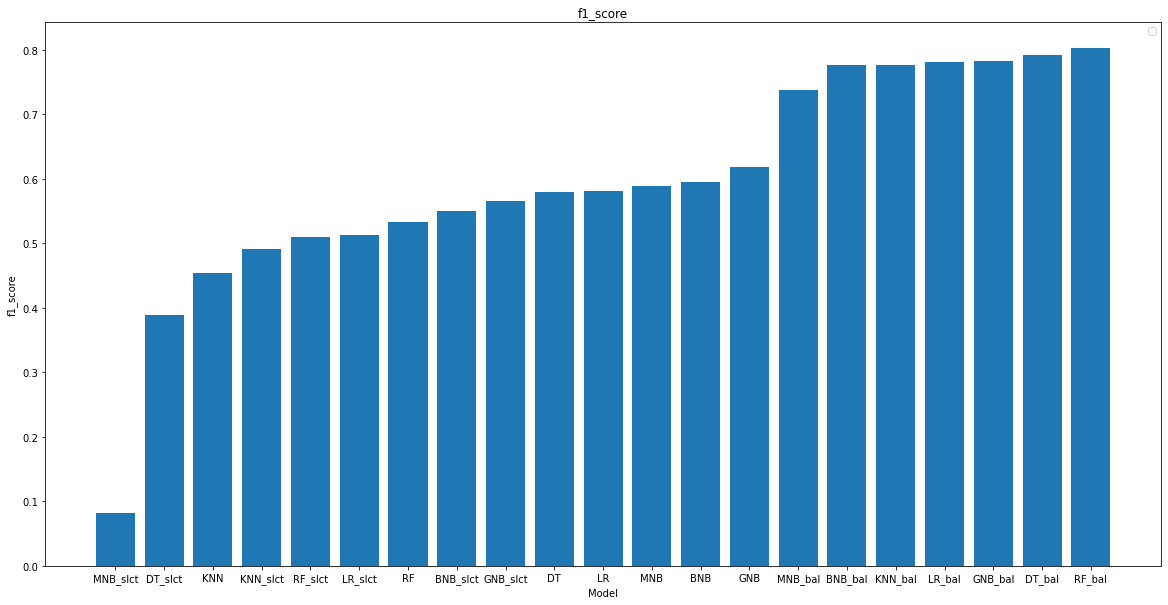

In [33]:
df_class = pd.DataFrame({"Model":str_model_list,
                  "f1_score":f1_initial_class,
                  "accuracy":accuracy_initial_class,
                  "precision":precision_initial_class,
                  "recall":recall_initial_class})
df_sorted= df_class.sort_values('f1_score')
fig = plt.figure(figsize = (20,10)) 
plt.bar('Model', 'f1_score',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("f1_score")
plt.title("f1_score")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


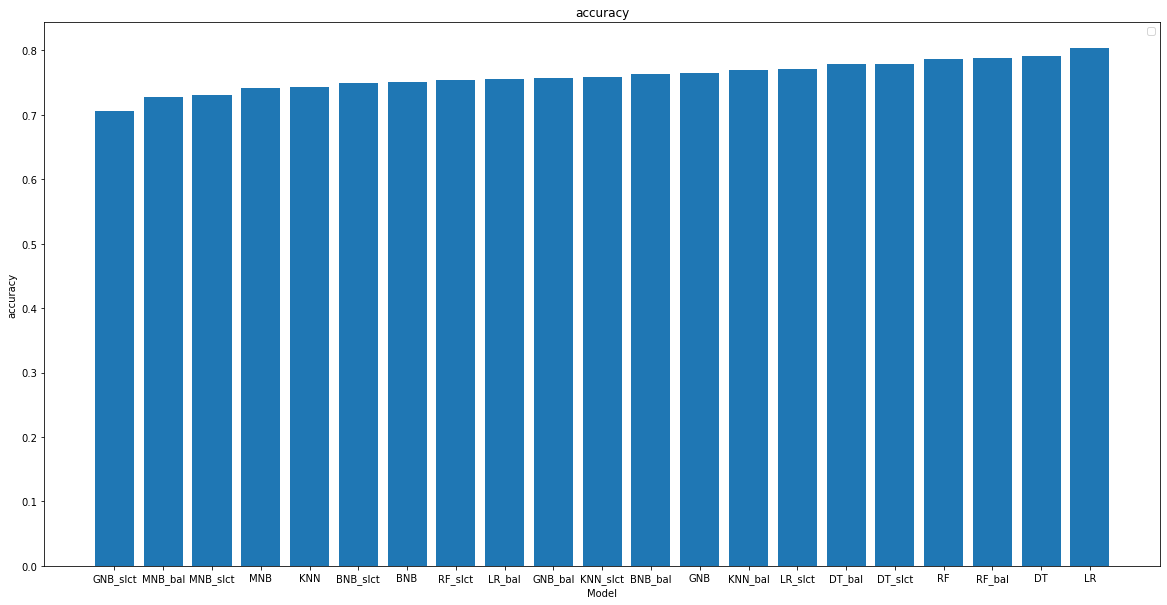

In [34]:
df_sorted= df_class.sort_values('accuracy')
fig = plt.figure(figsize = (20,10)) 
plt.bar('Model', 'accuracy',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


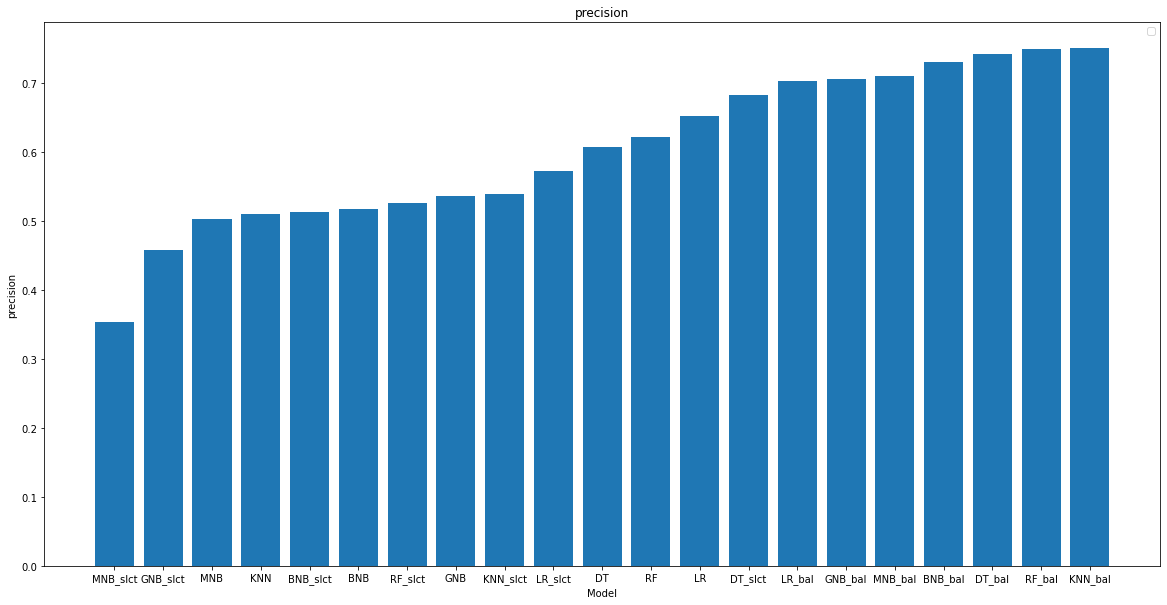

In [35]:
df_sorted= df_class.sort_values('precision')
fig = plt.figure(figsize = (20,10)) 
plt.bar('Model', 'precision',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("precision")
plt.title("precision")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


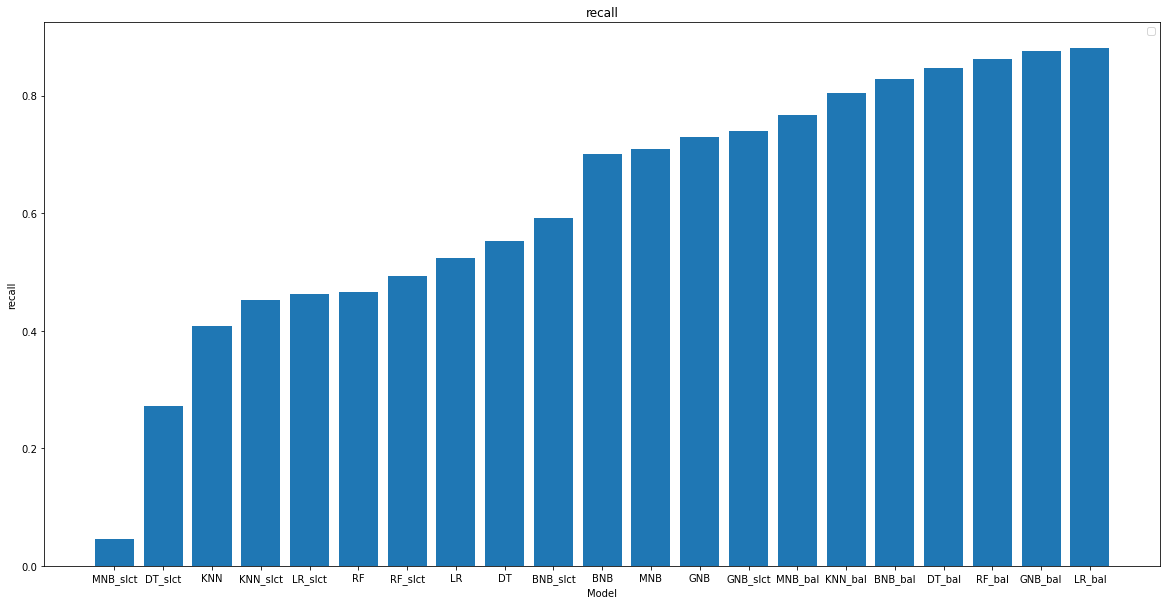

In [36]:
df_sorted= df_class.sort_values('recall')
fig = plt.figure(figsize = (20,10)) 
plt.bar('Model', 'recall',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("recall")
plt.title("recall")
plt.legend()
plt.show()

### Principalul lucru pe care il putem observa ca datasetul balansat are cele mai bune rezultate,iar MNB are cam cele mai mici rezultate pe toate dataseturile

In [37]:
df_class

Model  f1_score  accuracy  precision    recall
0         LR  0.580938  0.803407   0.653061  0.523161
1         RF  0.532710  0.787083   0.621818  0.465940
2         DT  0.579173  0.790632   0.607784  0.553134
3        GNB  0.618224  0.765082   0.536000  0.730245
4        KNN  0.453858  0.743790   0.510204  0.408719
5        BNB  0.594907  0.751597   0.517103  0.700272
6        MNB  0.588235  0.741661   0.502901  0.708447
7    LR_slct  0.512121  0.771469   0.572881  0.463014
8    RF_slct  0.509194  0.753726   0.526316  0.493151
9    DT_slct  0.388235  0.778566   0.682759  0.271233
10  GNB_slct  0.565445  0.705465   0.457627  0.739726
11  KNN_slct  0.491803  0.757984   0.539216  0.452055
12  BNB_slct  0.549618  0.748758   0.513064  0.591781
13  MNB_slct  0.082324  0.731015   0.354167  0.046575
14    LR_bal  0.781622  0.755448   0.702624  0.880633
15    RF_bal  0.802266  0.788741   0.750000  0.862363
16    DT_bal  0.791809  0.778450   0.742796  0.847747
17   GNB_bal  0.781947  0.757264   0.706287  0.875761
18   KNN_bal  0.776471  0.769976   0.750853  0.803898
19   BNB_bal  0.776256  0.762712   0.730397  0.828258
20   MNB_bal  0.736965  0.728208   0.709932  0.766139

# Analizam datasetul pentru regresie

### Corelatie dupa knn imputation

<AxesSubplot:>

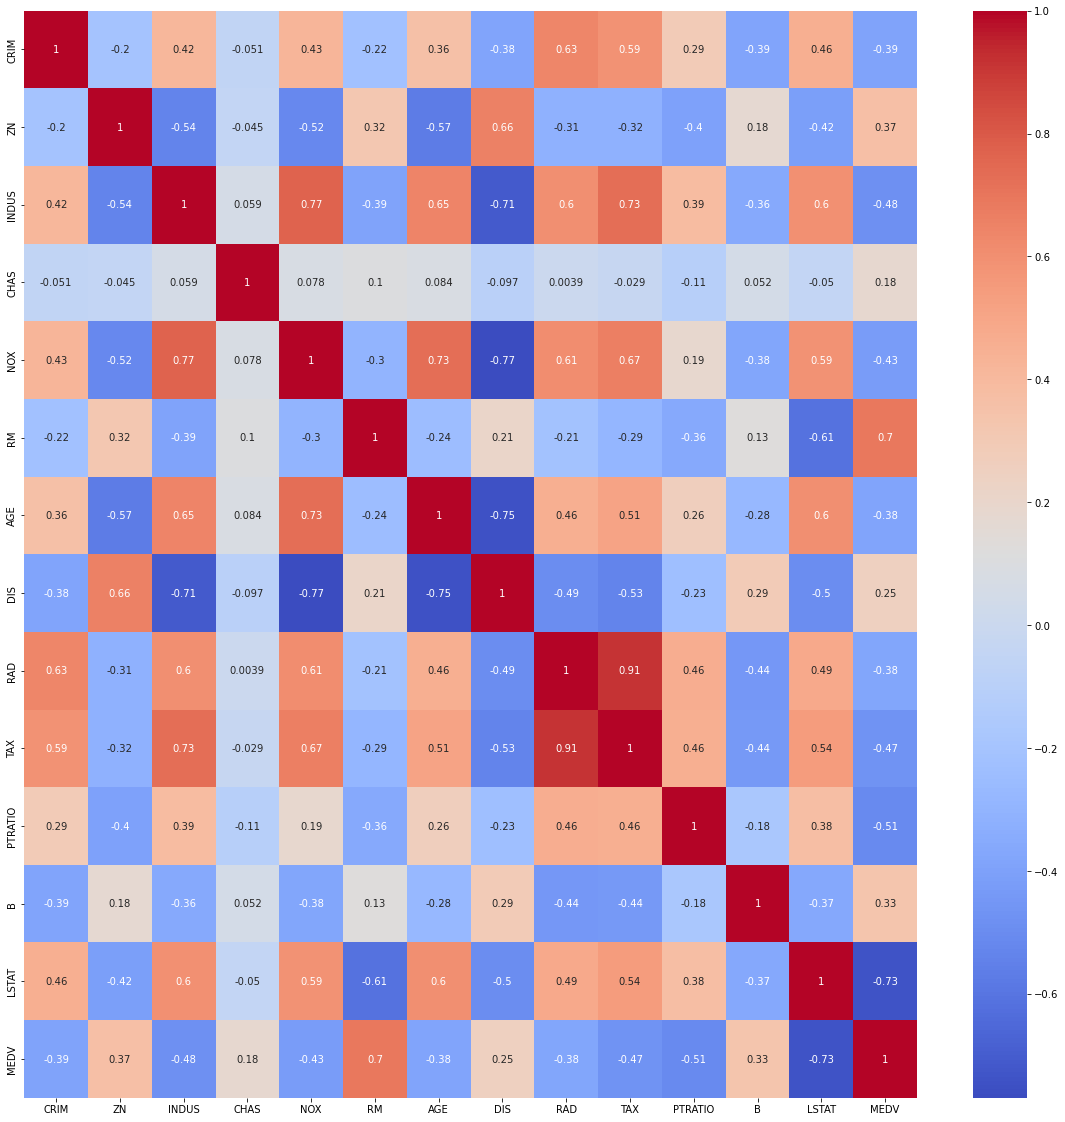

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data_regress_knn.corr(),annot = True,cmap = 'coolwarm')

### Corelatie initiala

<AxesSubplot:>

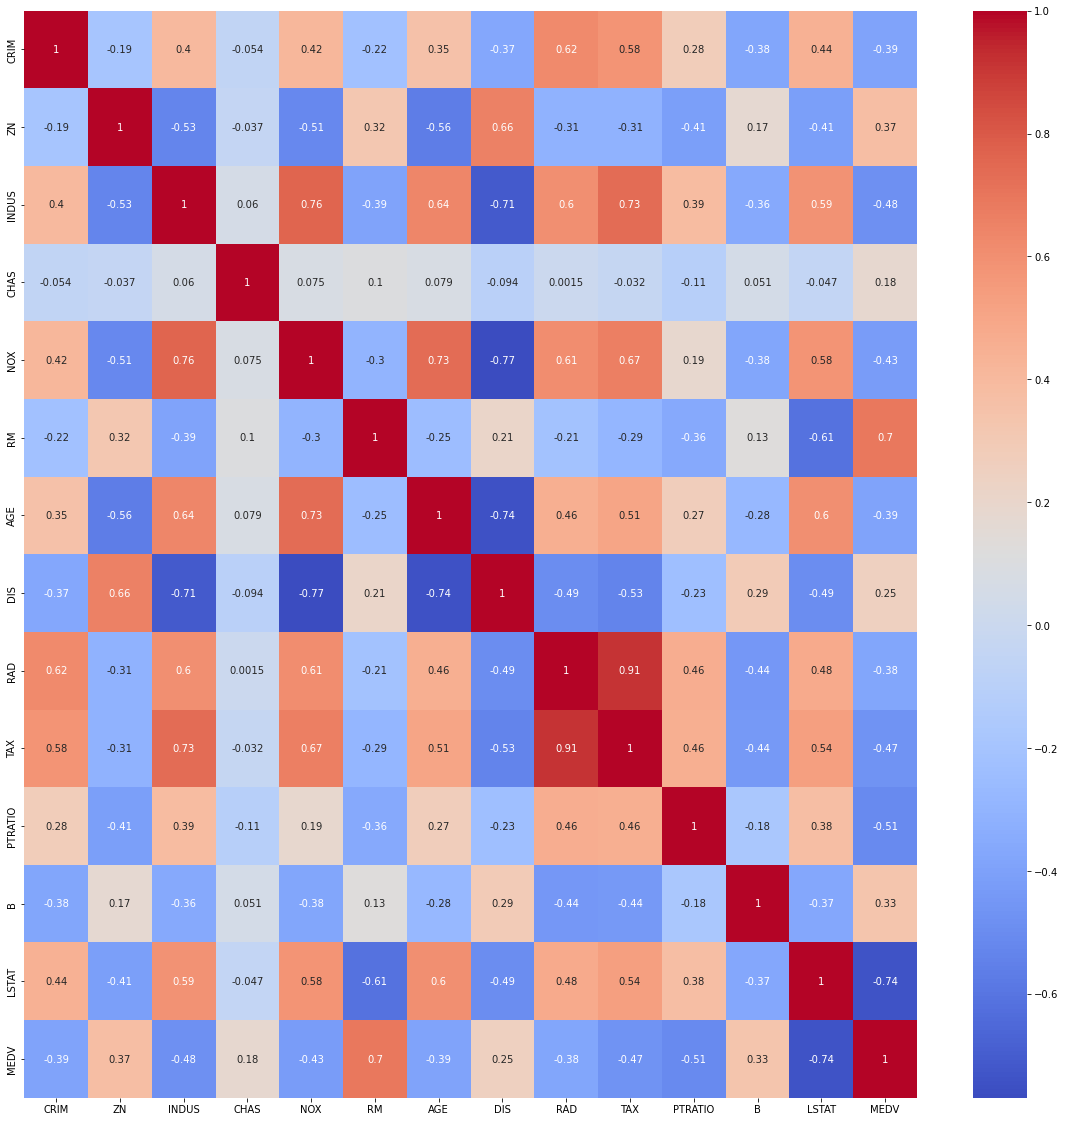

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(data_regress.corr(),annot = True,cmap = 'coolwarm')

### nu observam mari schimbari asa ca decidem sa eliminam datele nule plus ca nu sunt asa de multe

In [40]:
data_regress = data_regress.dropna()
X = data_regress.drop('MEDV',axis =1)
y = data_regress.loc[:,'MEDV']
X_train_regress,X_test_regress,y_train_regress,y_test_regress = train_test_split(X,y,test_size =0.2,random_state = 42)

### Corelatie dupa eliminare valori nule

<AxesSubplot:>

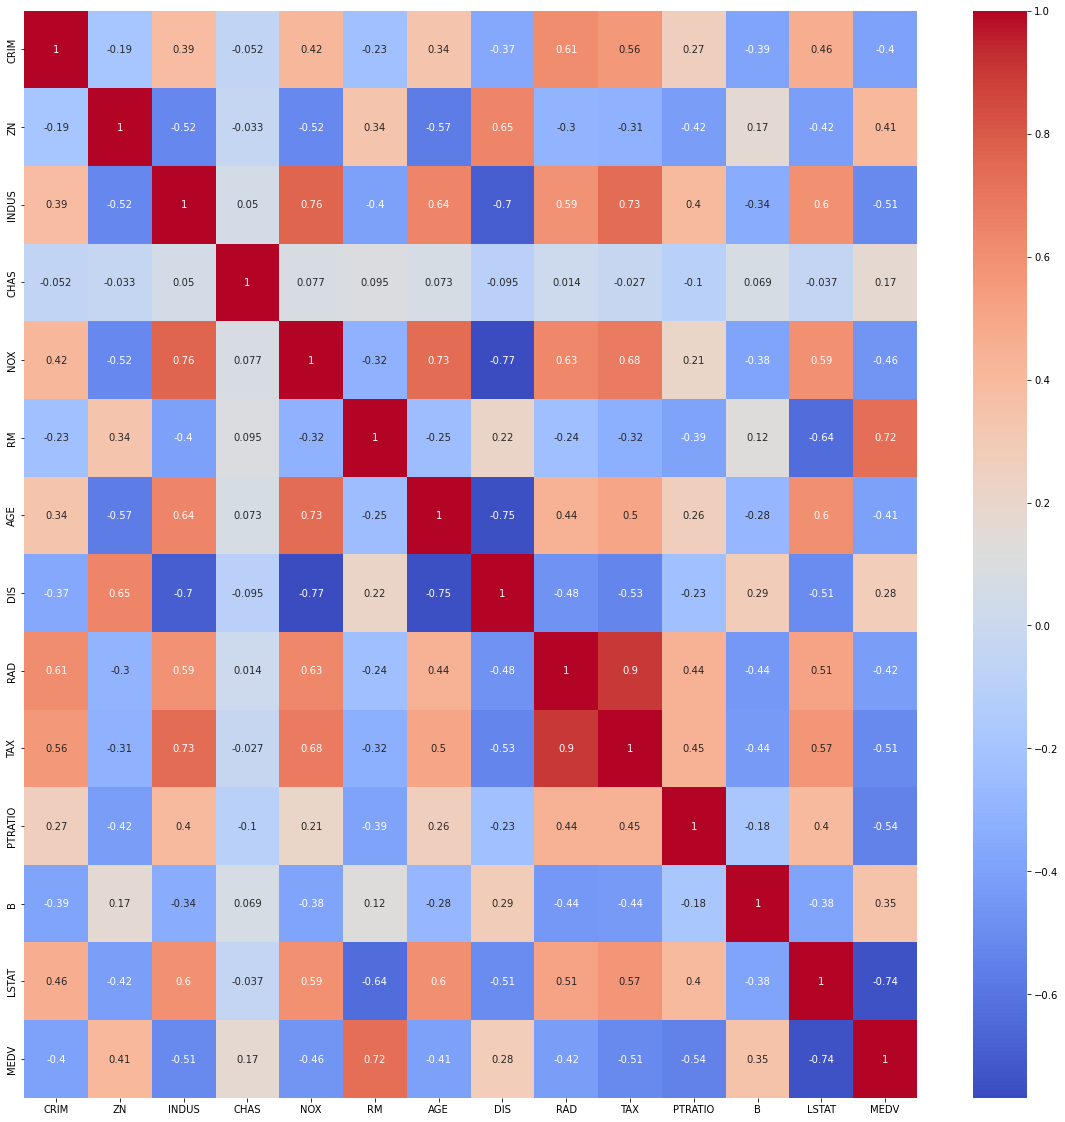

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data_regress.corr(),annot = True,cmap = 'coolwarm')

### Iar dupa eliminare ,corelatia s-a imbunatatit, si vom opera in continuare cu acest dataset
### Vom atrena modele utilizand urmatorii algoritmi de regresie : LinearRegression,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,SVR

### Mai intai pe datasetul de regresie initial

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
f1_initial_regress = []
regress_model_list=[LinearRegression,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,SVR]
str_regress_list=['LR','RF','DT','KNN','SVR']
mae_initial = []
mse_initial = []
rmse_initial = []
r2_initial = []
for model in regress_model_list :
    model = model()
    model.fit(X_train_regress,y_train_regress)
    y_pred = model.predict(X_test_regress)
    mae_initial.append(metrics.mean_absolute_error(y_test_regress,y_pred))
    mse_initial.append(metrics.mean_squared_error(y_test_regress,y_pred))
    rmse_initial.append(np.sqrt(metrics.mean_squared_error(y_test_regress,y_pred))) # or mse**(0.5)   
    r2_initial.append(metrics.r2_score(y_test_regress,y_pred))
   # print("\n "+str(model)+"\n "+ classification_report(y_test, y_pred))


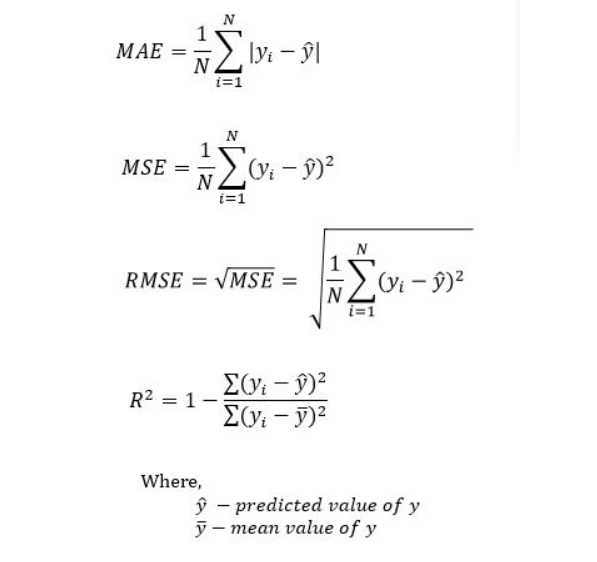

### Standartizam datele pentru ulterioara utilizare a PCA


In [43]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(X)
scalled_data=scaling.transform(X)
data_regress_scalling = pd.DataFrame(scaling.transform(X),columns = X.columns)
data_regress_scalling = pd.concat([data_regress_scalling,y],axis = 1)
#data_regress_scalling = pd.DataFrame(scaled_data,columns = data_regress.columns)
data_regress_scalling.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.400818  0.273342 -1.259620 -0.271237 -0.134687  0.423161 -0.134014   
1 -0.398535 -0.479051 -0.569724 -0.271237 -0.745475  0.202245  0.357849   
2 -0.398537 -0.479051 -0.569724 -0.271237 -0.745475  1.298216 -0.281214   
3 -0.397984 -0.479051 -1.278462 -0.271237 -0.842847  1.029962 -0.830521   
4 -0.398258 -0.479051 -1.278462 -0.271237 -0.842847  0.215156 -0.367380   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.135851 -0.974609 -0.656944 -1.496303  0.430740 -1.067126  24.0  
1  0.554334 -0.858633 -0.978184 -0.340879  0.430740 -0.497196  21.6  
2  0.554334 -0.858633 -0.978184 -0.340879  0.385097 -1.197278  34.7  
3  1.076829 -0.742657 -1.097162  0.075073  0.405283 -1.346610  33.4  
4  1.076829 -0.742657 -1.097162  0.075073  0.399564 -1.035615   NaN

### Corelatia dupa standartizare

<AxesSubplot:>

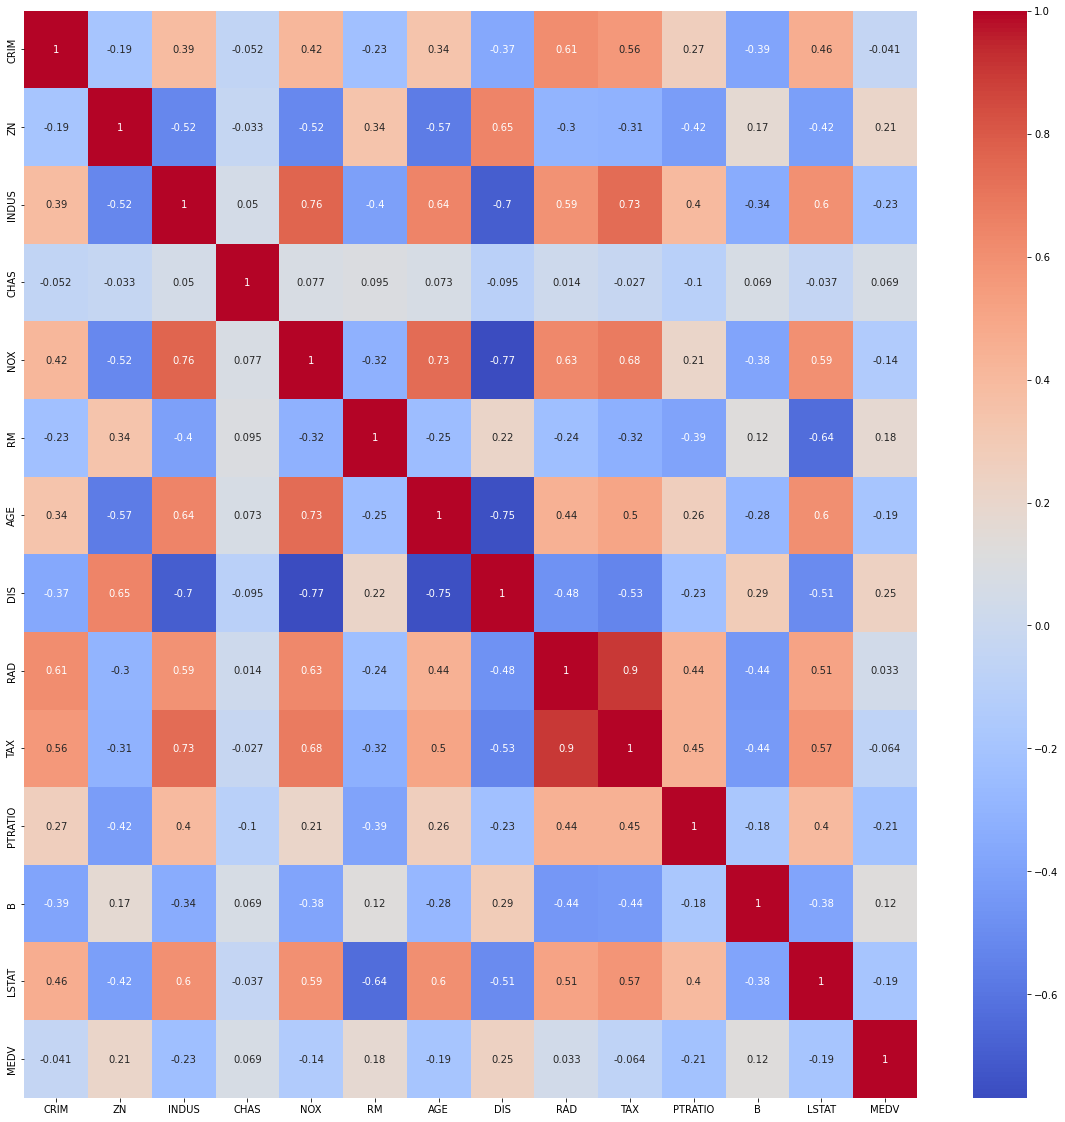

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(data_regress_scalling.corr(),annot = True,cmap = 'coolwarm')

In [45]:
data_regress_scalling=data_regress_scalling.dropna()

In [46]:
X_regress = data_regress_scalling.drop('MEDV',axis =1)
y_regress = data_regress_scalling.loc[:,'MEDV']

### Implematare PCA

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9)
pca.fit(X_regress)
reduced = pca.transform(X_regress)
X_pca = pd.DataFrame(reduced)
reduced = pd.concat([X_pca,y_regress],axis =1)
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y_regress,test_size = 0.2)

In [48]:
mae_pca = []
mse_pca = []
rmse_pca = []
r2_pca = []
for model in regress_model_list :
    model = model()
    model.fit(X_train_pca,y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    #print(f'{y_pred_pca}')
    mae_pca.append(metrics.mean_absolute_error(y_test_pca,y_pred_pca))
    mse_pca.append(metrics.mean_squared_error(y_test_pca,y_pred_pca))
    rmse_pca.append(np.sqrt(metrics.mean_squared_error(y_test_pca,y_pred_pca))) # or mse**(0.5)   
    r2_pca.append(metrics.r2_score(y_test_pca,y_pred_pca))

### Inlaturarea anomaliilor

In [49]:
from sklearn.ensemble import IsolationForest
iForest = IsolationForest(n_estimators=20, verbose=2)
iForest.fit(X_train_pca)

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


IsolationForest(n_estimators=20, verbose=2)

In [50]:
pred = iForest.predict(X_train_pca)
isolation_forest_outliers = np.count_nonzero(pred == -1)/np.count_nonzero(pred != 5)
X_train_iforest, y_train_iforest = X_train_pca.iloc[(pred != -1), :], y_train_pca[(pred != -1)]

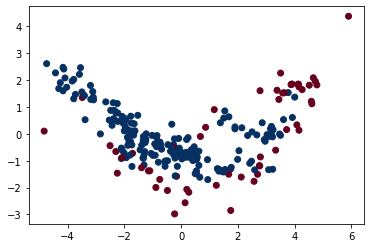

In [51]:
plt.scatter(X_train_pca.iloc[:, 0], X_train_pca.iloc[:, 1], c=pred, cmap='RdBu')

#### Procentajul de date anormale

In [52]:
isolation_forest_outliers*100

22.448979591836736

### Antrenarea modeleloe pe datasetul fara anomali

In [53]:
mae_pca_isolated = []
mse_pca_isolated = []
rmse_pca_isolated = []
r2_pca_isolated = []
for model in regress_model_list :
    model = model()
    model.fit(X_train_iforest,y_train_iforest)
    y_pred_pca_iforest = model.predict(X_test_pca)
    mae_pca_isolated.append(metrics.mean_absolute_error(y_test_pca,y_pred_pca_iforest))
    mse_pca_isolated.append(metrics.mean_squared_error(y_test_pca,y_pred_pca_iforest))
    rmse_pca_isolated.append(np.sqrt(metrics.mean_squared_error(y_test_pca,y_pred_pca_iforest))) # or mse**(0.5)   
    r2_pca_isolated.append(metrics.r2_score(y_test_pca,y_pred_pca_iforest))

### Pregatim datele pentru vizualizare

In [54]:
str_regress_list.extend(['LR+pca','RF+pca','DT+pca','KNN+pca','SVR+pca','LR+iso','RF+iso','DT+iso','KNN+iso','SVR+iso'])
#mae_list = mae_initial.extend(mae_pca.extend(mae_pca_isolated))
mae_initial.extend(mae_pca)
mae_initial.extend(mae_pca_isolated)
mae_initial
mse_initial.extend(mse_pca)
mse_initial.extend(mse_pca_isolated)
mse_initial
rmse_initial.extend(rmse_pca)
rmse_initial.extend(rmse_pca_isolated)
rmse_initial
r2_initial.extend(r2_pca)
r2_initial.extend(r2_pca_isolated)
r2_initial

[0.6270849941673187,
 0.6654356492813036,
 0.6173106220437743,
 0.3305245828866247,
 0.03253253927321631,
 0.09555713380131026,
 0.1917149707022041,
 -0.5453069488977282,
 0.08637483925348233,
 0.0552222129529627,
 -0.11803790314425888,
 0.044088900313918655,
 -0.6308030431027687,
 0.03524103807136547,
 0.041178820705743635]

In [55]:
df_regress = pd.DataFrame({"Model":str_regress_list,
                  "mae":mae_initial,
                  "mse":mse_initial,
                  "rmse":rmse_initial,
                  "r2":r2_initial})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


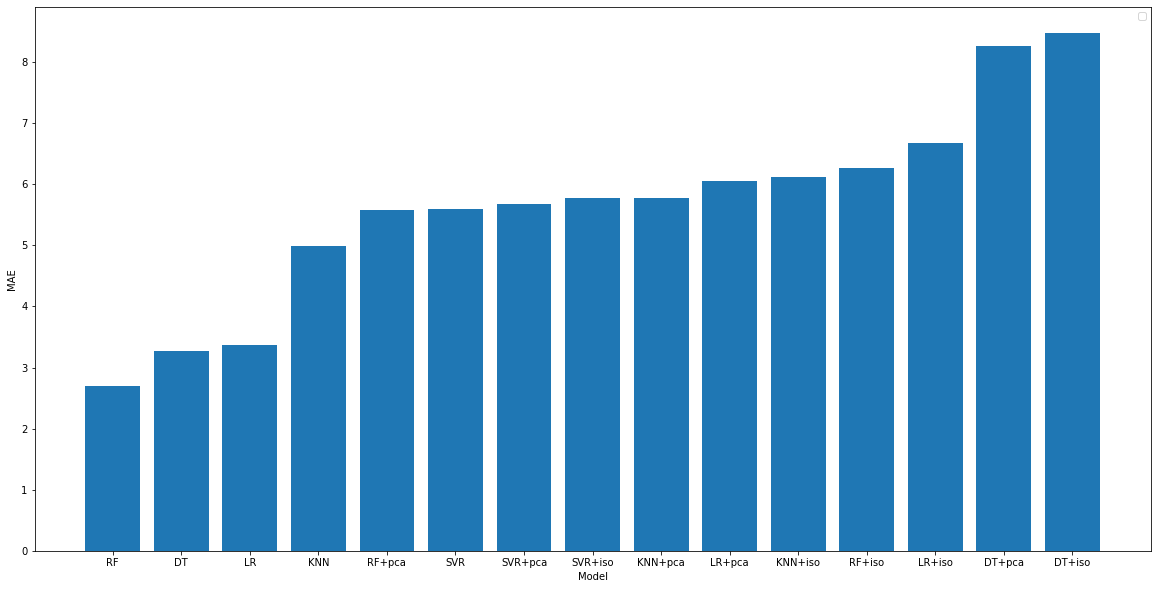

In [56]:
fig = plt.figure(figsize = (20,10)) 
df_sorted= df_regress.sort_values('mae')
plt.bar('Model', 'mae',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


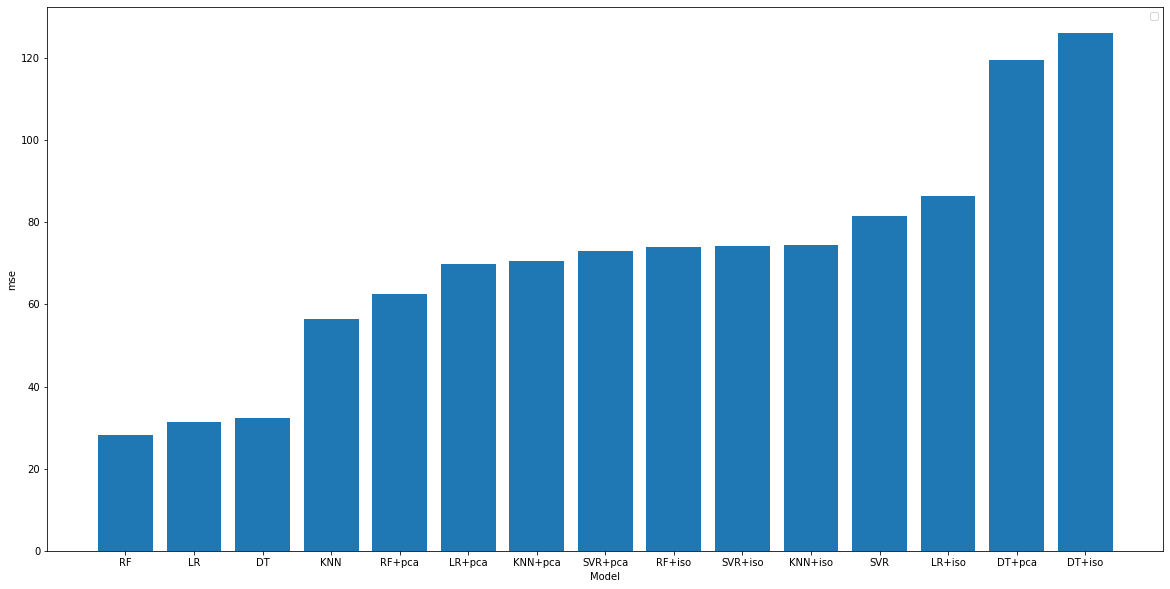

In [57]:
fig = plt.figure(figsize = (20,10)) 
df_sorted= df_regress.sort_values('mse')
plt.bar('Model', 'mse',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("mse")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


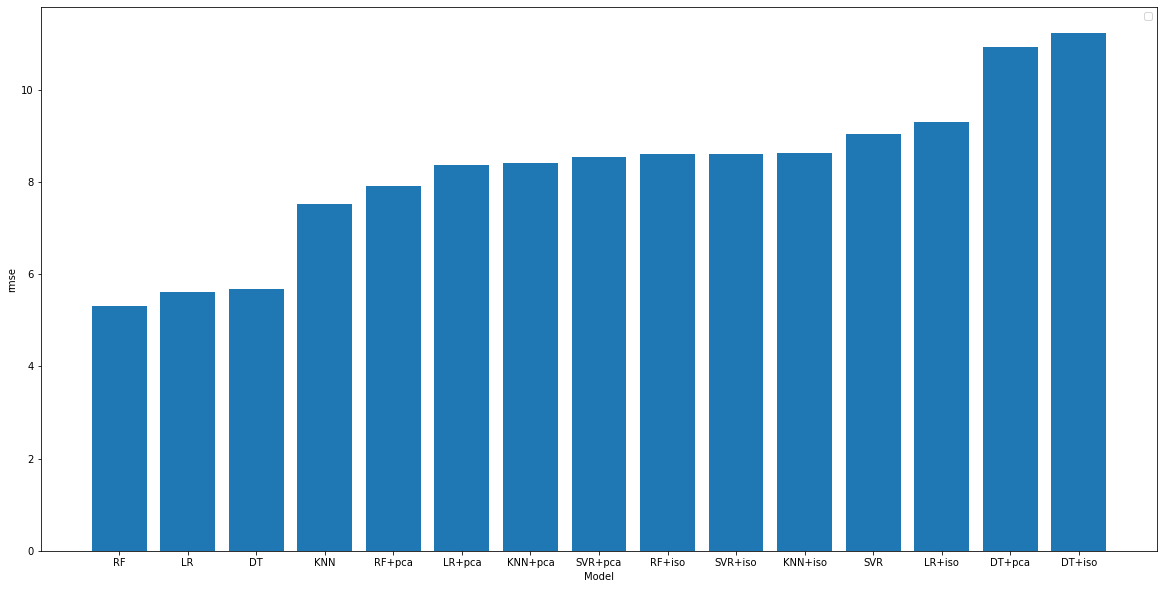

In [58]:
fig = plt.figure(figsize = (20,10)) 
df_sorted= df_regress.sort_values('rmse')
plt.bar('Model', 'rmse',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("rmse")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


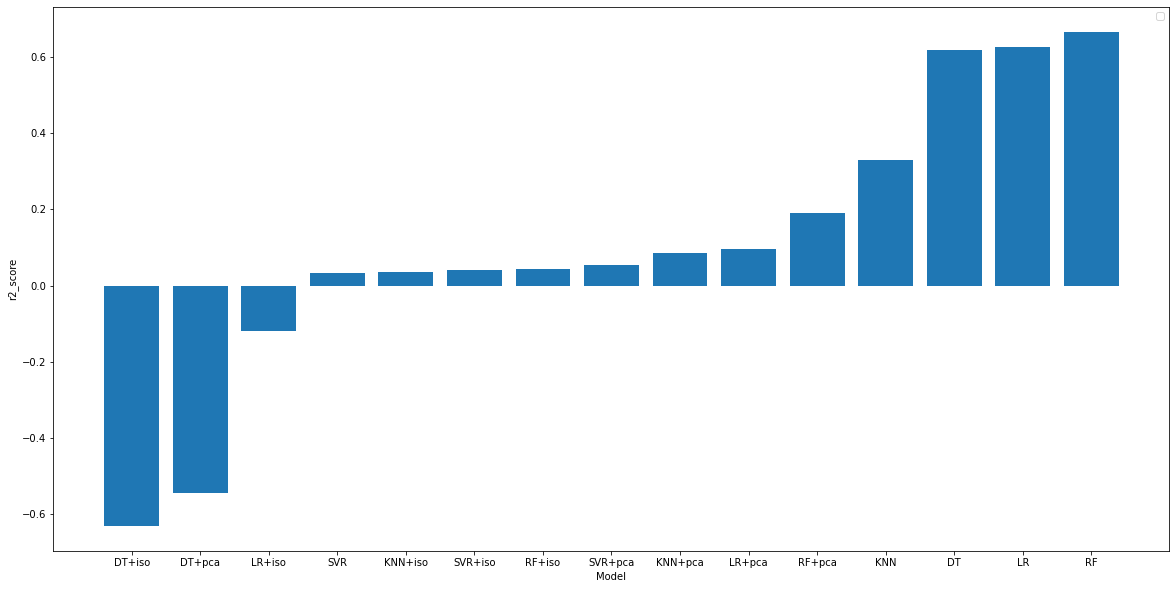

In [59]:
fig = plt.figure(figsize = (20,10)) 
df_sorted= df_regress.sort_values('r2')
plt.bar('Model', 'r2',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("r2_score")
plt.legend()
plt.show()

### Observam ca cele mai bune rezultate le are Decision Tree

In [60]:
df_regress.head(15)

Model       mae         mse       rmse        r2
0        LR  3.367983   31.454048   5.608391  0.627085
1        RF  2.691684   28.219307   5.312185  0.665436
2        DT  3.263291   32.278481   5.681415  0.617311
3       KNN  4.988861   56.467858   7.514510  0.330525
4       SVR  5.588270   81.602422   9.033406  0.032533
5    LR+pca  6.057383   69.905144   8.360930  0.095557
6    RF+pca  5.570500   62.473025   7.903988  0.191715
7    DT+pca  8.270968  119.438065  10.928772 -0.545307
8   KNN+pca  5.779355   70.614852   8.403264  0.086375
9   SVR+pca  5.676281   73.022664   8.545330  0.055222
10   LR+iso  6.669786   86.414083   9.295918 -0.118038
11   RF+iso  6.268887   73.883167   8.595532  0.044089
12   DT+iso  8.474194  126.046129  11.227027 -0.630803
13  KNN+iso  6.123548   74.567026   8.635220  0.035241
14  SVR+iso  5.768461   74.108090   8.608606  0.041179

In [61]:
import shap 
import xgboost as xgb

In [62]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_bal,y_train_bal)
# # The SHAP Values
import shap
shap.initjs()
explainer = shap.Explainer(rf.predict,X_train_bal)
shap_values = explainer(X_test_bal)

Exact explainer: 1653it [01:00, 24.61it/s]                                                                             


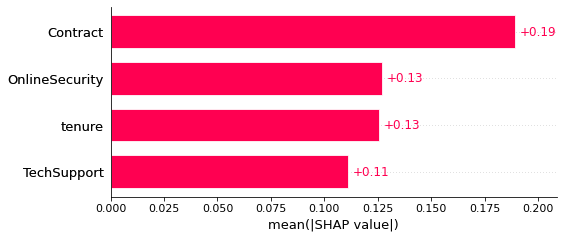

In [63]:
shap.plots.bar(shap_values, max_display=20) # default is max_display=12

### Aici putem observa fiecare coloana cat de mult influenteaza targetul

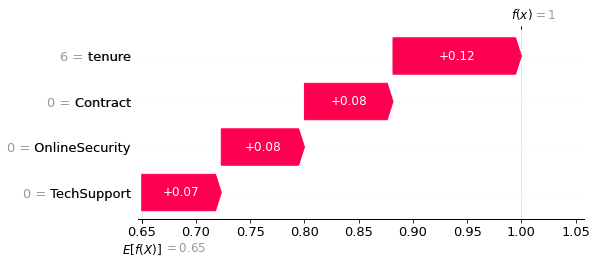

In [64]:
shap.plots.waterfall(shap_values[2],max_display=15) # For the second observation

#### observam modul în care valorile SHAP  ale fiecărei coloana mută rezultatul modelului de la așteptările noastre anterioare sub distribuția datelor de fundal, la predicția finală a modelului

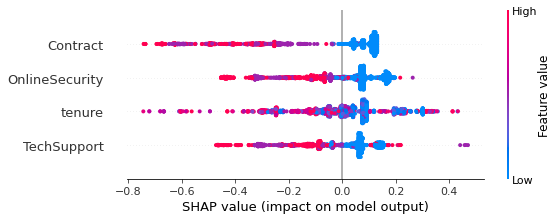

In [65]:
shap.plots.beeswarm(shap_values, max_display=18)

### Acest grafic ne arata cum datele in functie de distributia lor , ne influenteaza rezultatul prezicerii, cu albastru influeteaza putin, cu rosu mult

In [66]:
#explainerr = shap.TreeExplainer(dt)
#shap_valuess = explainerr.shap_values(X_test_class)
shap.force_plot(shap_values[2])

### Acest grafic ne arata care caracteristica are cel mai mare impact in prezicerea unui anumit caz

In [67]:
import lime
import lime.lime_tabular

In [68]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_regress.values, feature_names=X_train_regress.columns.values.tolist(),
                                                  class_names=['MEDV'], verbose=True, mode='regression')

In [69]:
j = 5
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train_regress,y_train_regress)
exp = explainer.explain_instance(X_test_regress.values[j], dt.predict, num_features=6)

Intercept 20.20558220733965
Prediction_local [38.56261916]
Right: 36.5


In [70]:
exp.show_in_notebook(show_table=True, show_all=False)

### Acest grafic ne arata pozitia in intervalul de prezicere, valorile fiecarei carecteristici in aceasta prezicere si influenta la features asupra rezultatului

## In concluzie, in urma efectuarii taskurilor, m-am familiarizat cu algoritmi noi, am acumulat mai multe cunostinte in lucrul cu regresia si cel mai important, am invatat despre interpretarea modelului, si anume de grafice pentru clasificare si regresie,care ne redau cel mai bine influenta datelor asupra prezicerii, pentru explicare clara,care este necesara intr-un proiect real